# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:21:27.683717: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:21:30.561252
2025-04-14 21:21:30.561252


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:21:25"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

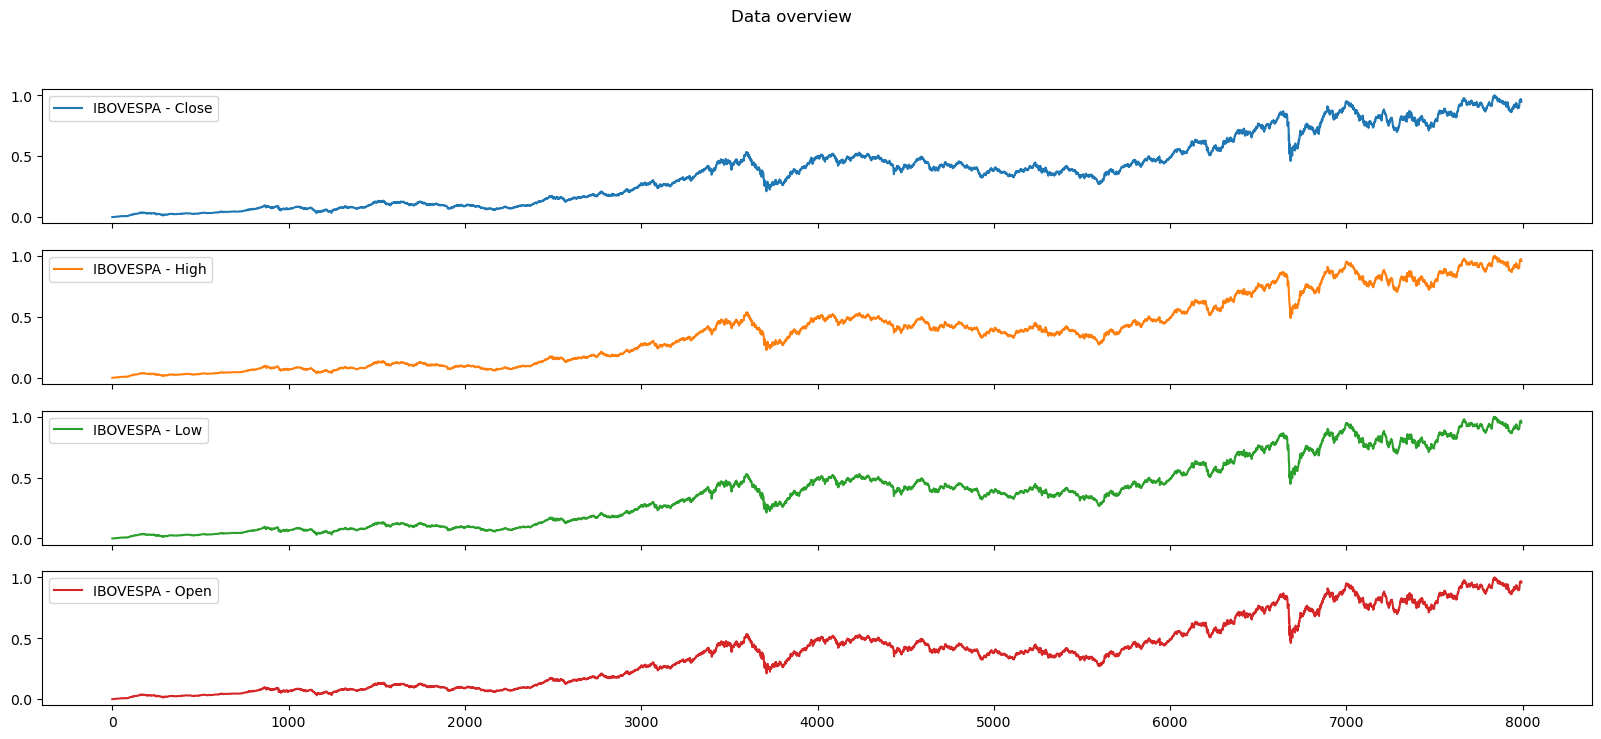

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

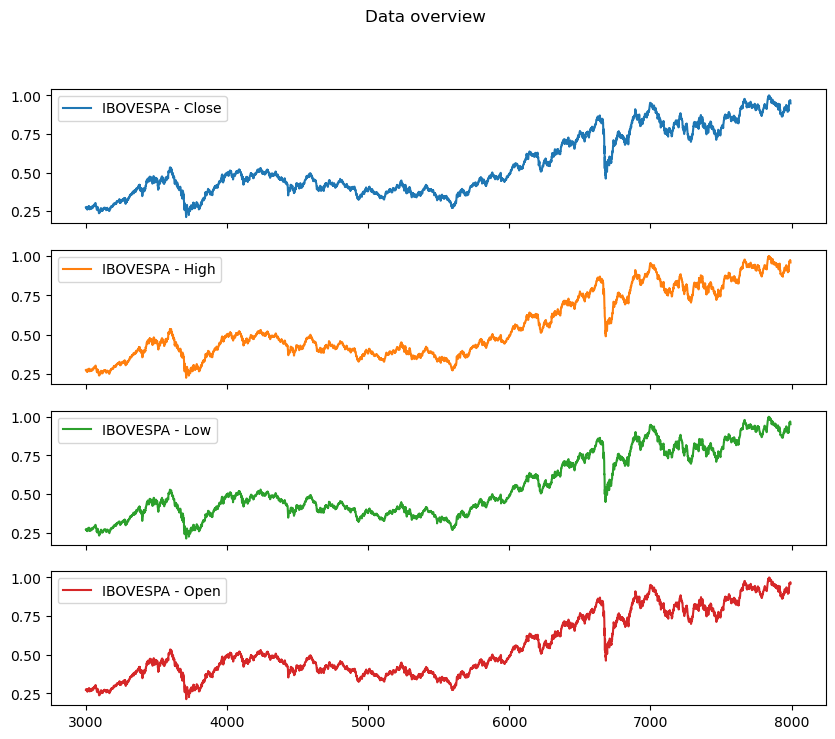

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

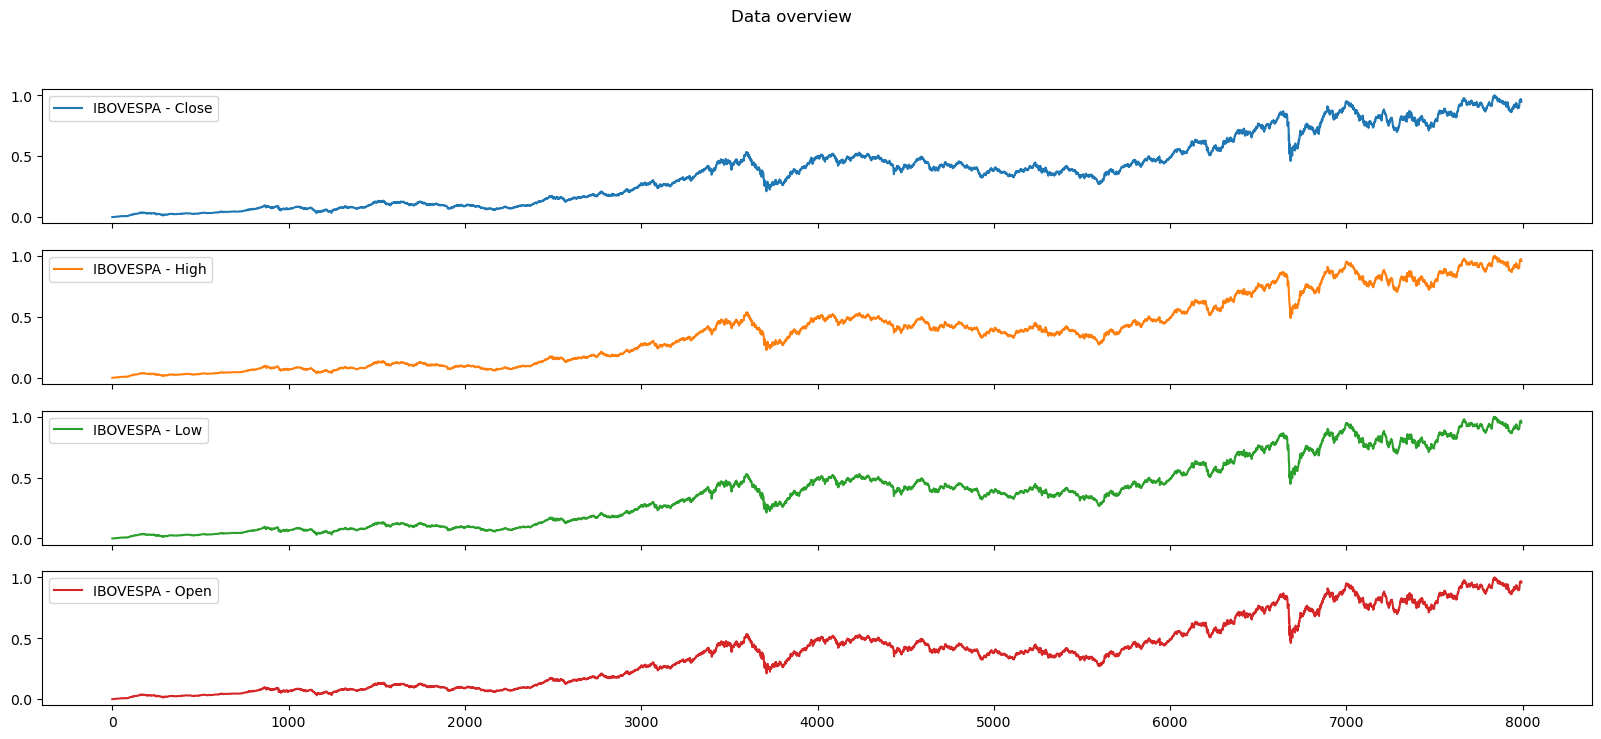

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

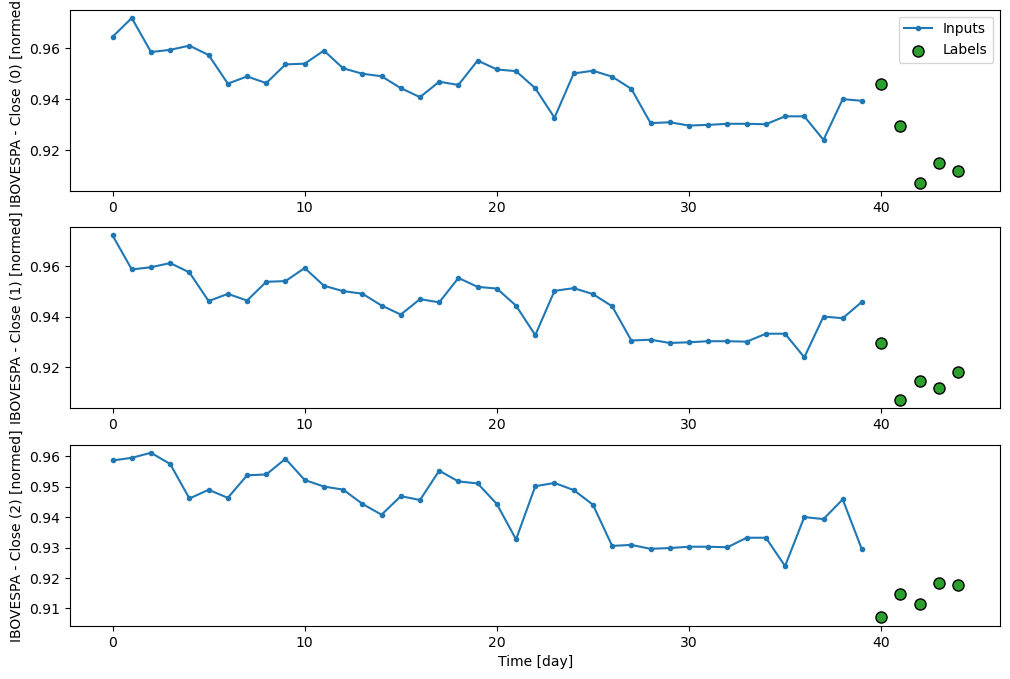

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14:27 4s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 75.3273 - mean_squared_error: 6.9871e-05 - root_mean_squared_error: 0.0081  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 65.1926 - mean_squared_error: 8.0681e-05 - root_mean_squared_error: 0.0088

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 57.9590 - mean_squared_error: 8.0087e-05 - root_mean_squared_error: 0.0088

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 53.0954 - mean_squared_error: 7.8615e-05 - root_mean_squared_error: 0.0088

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 49.7833 - mean_squared_error: 7.7788e-05 - root_mean_squared_error: 0.0087

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 46.9612 - mean_squared_error: 7.5923e-05 - root_mean_squared_error: 0.0086

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 44.4944 - mean_squared_error: 7.3620e-05 - root_mean_squared_error: 0.0085

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 42.3356 - mean_squared_error: 7.1258e-05 - root_mean_squared_error: 0.0084

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 40.4224 - mean_squared_error: 6.8932e-05 - root_mean_squared_error: 0.0082

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 38.6974 - mean_squared_error: 6.6662e-05 - root_mean_squared_error: 0.0081

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 37.1586 - mean_squared_error: 6.4700e-05 - root_mean_squared_error: 0.0080

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 35.8694 - mean_squared_error: 6.4176e-05 - root_mean_squared_error: 0.0079

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 34.7535 - mean_squared_error: 6.4873e-05 - root_mean_squared_error: 0.0080

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 33.7747 - mean_squared_error: 6.6154e-05 - root_mean_squared_error: 0.0081

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 32.9053 - mean_squared_error: 6.7640e-05 - root_mean_squared_error: 0.0081

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 32.1282 - mean_squared_error: 6.9504e-05 - root_mean_squared_error: 0.0083

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 31.4285 - mean_squared_error: 7.1424e-05 - root_mean_squared_error: 0.0084

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.8996 - mean_squared_error: 7.4819e-05 - root_mean_squared_error: 0.0085

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 30.4423 - mean_squared_error: 7.8180e-05 - root_mean_squared_error: 0.0087

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 30.0359 - mean_squared_error: 8.1955e-05 - root_mean_squared_error: 0.0089

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.6659 - mean_squared_error: 8.5755e-05 - root_mean_squared_error: 0.0091

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 29.3084 - mean_squared_error: 8.9194e-05 - root_mean_squared_error: 0.0092

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.9673 - mean_squared_error: 9.2692e-05 - root_mean_squared_error: 0.0094

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.6363 - mean_squared_error: 9.5940e-05 - root_mean_squared_error: 0.0096

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.3073 - mean_squared_error: 9.8751e-05 - root_mean_squared_error: 0.0097

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 27.9953 - mean_squared_error: 1.0155e-04 - root_mean_squared_error: 0.0098

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.6898 - mean_squared_error: 1.0407e-04 - root_mean_squared_error: 0.0099

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.3862 - mean_squared_error: 1.0623e-04 - root_mean_squared_error: 0.0100

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 27.0909 - mean_squared_error: 1.0817e-04 - root_mean_squared_error: 0.0101

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 26.8068 - mean_squared_error: 1.0994e-04 - root_mean_squared_error: 0.0102

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 26.5315 - mean_squared_error: 1.1154e-04 - root_mean_squared_error: 0.0103

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 26.2683 - mean_squared_error: 1.1304e-04 - root_mean_squared_error: 0.0104

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 26.0381 - mean_squared_error: 1.1490e-04 - root_mean_squared_error: 0.0105

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 25.8259 - mean_squared_error: 1.1681e-04 - root_mean_squared_error: 0.0105

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 25.6177 - mean_squared_error: 1.1852e-04 - root_mean_squared_error: 0.0106

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 25.4263 - mean_squared_error: 1.2048e-04 - root_mean_squared_error: 0.0107

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 25.2581 - mean_squared_error: 1.2353e-04 - root_mean_squared_error: 0.0108

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 25.1174 - mean_squared_error: 1.2958e-04 - root_mean_squared_error: 0.0110

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 24.9982 - mean_squared_error: 1.3809e-04 - root_mean_squared_error: 0.0113

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 24.8308 - mean_squared_error: 1.5088e-04 - root_mean_squared_error: 0.0117

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 24.7168 - mean_squared_error: 1.5874e-04 - root_mean_squared_error: 0.0119

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 24.6028 - mean_squared_error: 1.6620e-04 - root_mean_squared_error: 0.0122

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 24.4904 - mean_squared_error: 1.7344e-04 - root_mean_squared_error: 0.0124

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 24.3783 - mean_squared_error: 1.8039e-04 - root_mean_squared_error: 0.0126

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 24.2693 - mean_squared_error: 1.8747e-04 - root_mean_squared_error: 0.0128

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 24.1665 - mean_squared_error: 1.9572e-04 - root_mean_squared_error: 0.0131

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 24.0659 - mean_squared_error: 2.0422e-04 - root_mean_squared_error: 0.0133

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 23.9666 - mean_squared_error: 2.1262e-04 - root_mean_squared_error: 0.0135

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 23.8667 - mean_squared_error: 2.2072e-04 - root_mean_squared_error: 0.0138

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 23.7673 - mean_squared_error: 2.2874e-04 - root_mean_squared_error: 0.0140

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 23.6676 - mean_squared_error: 2.3654e-04 - root_mean_squared_error: 0.0142

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 23.5685 - mean_squared_error: 2.4453e-04 - root_mean_squared_error: 0.0144

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 23.4684 - mean_squared_error: 2.5234e-04 - root_mean_squared_error: 0.0146

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 23.3675 - mean_squared_error: 2.5985e-04 - root_mean_squared_error: 0.0148

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 23.2667 - mean_squared_error: 2.6745e-04 - root_mean_squared_error: 0.0150

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 23.1690 - mean_squared_error: 2.7630e-04 - root_mean_squared_error: 0.0153

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 23.0876 - mean_squared_error: 2.9394e-04 - root_mean_squared_error: 0.0156

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 23.0180 - mean_squared_error: 3.1644e-04 - root_mean_squared_error: 0.0160

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 22.9502 - mean_squared_error: 3.3880e-04 - root_mean_squared_error: 0.0164

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 22.8858 - mean_squared_error: 3.6258e-04 - root_mean_squared_error: 0.0169

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 22.8281 - mean_squared_error: 3.9267e-04 - root_mean_squared_error: 0.0174

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 22.7771 - mean_squared_error: 4.3026e-04 - root_mean_squared_error: 0.0179

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 22.7307 - mean_squared_error: 4.7239e-04 - root_mean_squared_error: 0.0185

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 22.6861 - mean_squared_error: 5.1485e-04 - root_mean_squared_error: 0.0191

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 22.6410 - mean_squared_error: 5.5631e-04 - root_mean_squared_error: 0.0197

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 22.5963 - mean_squared_error: 5.9752e-04 - root_mean_squared_error: 0.0202

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 22.5528 - mean_squared_error: 6.3867e-04 - root_mean_squared_error: 0.0208

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 22.5100 - mean_squared_error: 6.7906e-04 - root_mean_squared_error: 0.0213

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 22.4670 - mean_squared_error: 7.1827e-04 - root_mean_squared_error: 0.0219

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 22.4229 - mean_squared_error: 7.5620e-04 - root_mean_squared_error: 0.0224

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 22.3796 - mean_squared_error: 7.9374e-04 - root_mean_squared_error: 0.0229

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 22.3347 - mean_squared_error: 8.2974e-04 - root_mean_squared_error: 0.0234

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 22.2884 - mean_squared_error: 8.6423e-04 - root_mean_squared_error: 0.0239

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 22.2404 - mean_squared_error: 8.9725e-04 - root_mean_squared_error: 0.0243

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 22.1922 - mean_squared_error: 9.2913e-04 - root_mean_squared_error: 0.0247

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 22.1458 - mean_squared_error: 9.6081e-04 - root_mean_squared_error: 0.0252

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 22.0996 - mean_squared_error: 9.9154e-04 - root_mean_squared_error: 0.0256

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 22.0526 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0260    

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 22.0049 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0264

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 21.9581 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0268

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 21.9131 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 21.8687 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0275

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 21.8244 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0279

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 21.7801 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0283

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 21.7356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 21.6922 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0289

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 21.6496 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0293

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 21.6063 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0296

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 21.5633 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0299

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 21.5212 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 21.4801 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 21.4393 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0308

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 21.3991 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 21.3593 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 21.3199 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 21.2805 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0320

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 21.2410 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0322

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 21.2009 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0325

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 21.1605 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 21.1196 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 21.0784 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0333

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 21.0366 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0335

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 20.9955 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0338

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 20.9581 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 20.9222 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 20.8869 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0347

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 20.8511 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 20.8151 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 20.7790 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0357

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 20.7427 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0360

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 20.7064 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0363

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 20.6698 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 20.6331 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0368

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 20.5961 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 20.5588 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 20.5212 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 20.4837 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0379

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 20.4466 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0382 - val_loss: 0.1215 - val_mean_absolute_error: 0.1215 - val_mean_absolute_percentage_error: 12.9148 - val_mean_squared_error: 0.0156 - val_root_mean_squared_error: 0.1248 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8019 - mean_absolute_error: 0.8019 - mean_absolute_percentage_error: 10774.8008 - mean_squared_error: 0.6431 - root_mean_squared_error: 0.8019

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8021 - mean_absolute_error: 0.8021 - mean_absolute_percentage_error: 9018.2363 - mean_squared_error: 0.6434 - root_mean_squared_error: 0.8021  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7986 - mean_absolute_error: 0.7986 - mean_absolute_percentage_error: 7662.8057 - mean_squared_error: 0.6379 - root_mean_squared_error: 0.7986

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7938 - mean_absolute_error: 0.7938 - mean_absolute_percentage_error: 6797.5015 - mean_squared_error: 0.6303 - root_mean_squared_error: 0.7939

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7872 - mean_absolute_error: 0.7872 - mean_absolute_percentage_error: 6244.9390 - mean_squared_error: 0.6203 - root_mean_squared_error: 0.7875

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7773 - mean_absolute_error: 0.7773 - mean_absolute_percentage_error: 5829.7402 - mean_squared_error: 0.6062 - root_mean_squared_error: 0.7783

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7599 - mean_absolute_error: 0.7599 - mean_absolute_percentage_error: 5471.5879 - mean_squared_error: 0.5862 - root_mean_squared_error: 0.7646

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7391 - mean_absolute_error: 0.7391 - mean_absolute_percentage_error: 5158.5127 - mean_squared_error: 0.5640 - root_mean_squared_error: 0.7490

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7173 - mean_absolute_error: 0.7173 - mean_absolute_percentage_error: 4882.6777 - mean_squared_error: 0.5416 - root_mean_squared_error: 0.7329

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6948 - mean_absolute_error: 0.6948 - mean_absolute_percentage_error: 4635.6123 - mean_squared_error: 0.5199 - root_mean_squared_error: 0.7167

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6726 - mean_absolute_error: 0.6726 - mean_absolute_percentage_error: 4413.6509 - mean_squared_error: 0.4993 - root_mean_squared_error: 0.7009

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6511 - mean_absolute_error: 0.6511 - mean_absolute_percentage_error: 4213.1235 - mean_squared_error: 0.4799 - root_mean_squared_error: 0.6857

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6304 - mean_absolute_error: 0.6304 - mean_absolute_percentage_error: 4031.1499 - mean_squared_error: 0.4619 - root_mean_squared_error: 0.6711

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6106 - mean_absolute_error: 0.6106 - mean_absolute_percentage_error: 3865.4370 - mean_squared_error: 0.4451 - root_mean_squared_error: 0.6573

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5920 - mean_absolute_error: 0.5920 - mean_absolute_percentage_error: 3714.0193 - mean_squared_error: 0.4294 - root_mean_squared_error: 0.6442

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - mean_absolute_percentage_error: 3575.2080 - mean_squared_error: 0.4149 - root_mean_squared_error: 0.6318

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5577 - mean_absolute_error: 0.5577 - mean_absolute_percentage_error: 3447.4548 - mean_squared_error: 0.4014 - root_mean_squared_error: 0.6201

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5421 - mean_absolute_error: 0.5421 - mean_absolute_percentage_error: 3329.5037 - mean_squared_error: 0.3888 - root_mean_squared_error: 0.6089

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 3220.2898 - mean_squared_error: 0.3770 - root_mean_squared_error: 0.5983

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5134 - mean_absolute_error: 0.5134 - mean_absolute_percentage_error: 3118.8474 - mean_squared_error: 0.3659 - root_mean_squared_error: 0.5883

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - mean_absolute_percentage_error: 3024.3894 - mean_squared_error: 0.3556 - root_mean_squared_error: 0.5787

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4878 - mean_absolute_error: 0.4878 - mean_absolute_percentage_error: 2936.1797 - mean_squared_error: 0.3459 - root_mean_squared_error: 0.5696

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - mean_absolute_percentage_error: 2853.5991 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5609

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4650 - mean_absolute_error: 0.4650 - mean_absolute_percentage_error: 2776.0972 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5526

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2703.2078 - mean_squared_error: 0.3200 - root_mean_squared_error: 0.5447

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4444 - mean_absolute_error: 0.4444 - mean_absolute_percentage_error: 2634.5090 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5371

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 2569.6421 - mean_squared_error: 0.3050 - root_mean_squared_error: 0.5299

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 2508.2944 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5229

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 2450.1687 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5162

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2395.0183 - mean_squared_error: 0.2852 - root_mean_squared_error: 0.5098

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4010 - mean_absolute_error: 0.4010 - mean_absolute_percentage_error: 2342.6155 - mean_squared_error: 0.2792 - root_mean_squared_error: 0.5036

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 2292.7434 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.4977

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 2245.2163 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4919

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 2199.8787 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4864

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 2156.5681 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.4810

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 2115.1516 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4759

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 2075.5010 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4709

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 2037.4932 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4660

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 2001.0222 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4613

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3432 - mean_absolute_error: 0.3432 - mean_absolute_percentage_error: 1965.9994 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4568

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1932.3491 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4524

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1899.9799 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4481

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1868.8118 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4440

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1838.7797 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4400

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1809.8165 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4360

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1781.8633 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4322

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1754.8654 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4285

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1728.7721 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4249

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1703.5413 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4214

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1679.1301 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4180

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1655.4923 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4147

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1632.5911 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4114

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1610.3949 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4083

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1588.8712 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4052

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1567.9884 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4022

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1547.7144 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3992

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1528.0217 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.3964

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1508.8954 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3936

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1490.3256 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3909

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1472.2828 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3883

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1454.7332 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3858

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1437.6493 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3833

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1421.0107 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3808

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1404.8010 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3785

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1389.0020 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3761

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1373.5977 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3739

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 1358.5726 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3716

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1343.9110 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3694

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1329.6010 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3673

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1315.6328 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3652

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1301.9929 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3631

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1288.6663 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3611

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 1275.6420 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3591

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1262.9093 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3571

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1250.4578 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3552

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1238.2781 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3533

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1226.3611 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3514

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1214.6989 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3496

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1203.2817 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3478

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1192.1025 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3460

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 1181.1534 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3443

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1170.4283 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3425

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1159.9196 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3409

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1149.6193 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3392

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1139.5215 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3376

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1129.6201 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3359

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1119.9106 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3343

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1110.3885 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3328

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1101.0458 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3312

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1091.8773 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3297

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1082.8794 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3282

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1074.0472 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3268

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 1065.3762 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3253

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1056.8613 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3239

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1048.4987 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3225

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 1040.2839 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3211

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 1032.2131 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3198

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1024.2809 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3184

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 1016.4835 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3171

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1008.8177 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3158

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 1001.2800 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3145

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 993.8669 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3132 

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 986.5751 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3120

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 979.4016 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3108

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 972.3460 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3095

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 965.4048 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3084

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 958.5745 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3072

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 951.8512 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3060

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 945.2320 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3049

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 938.7146 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3038

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 932.2966 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3027

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 925.9761 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3016

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 919.7504 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3005

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 913.6176 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.2994

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 907.5751 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.2984

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 901.6208 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.2973

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 895.7528 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.2963

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 889.9693 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.2952

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 881.4582 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2937 - val_loss: 0.1682 - val_mean_absolute_error: 0.1682 - val_mean_absolute_percentage_error: 17.9183 - val_mean_squared_error: 0.0291 - val_root_mean_squared_error: 0.1706 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.7592 - mean_absolute_error: 0.7592 - mean_absolute_percentage_error: 10200.2773 - mean_squared_error: 0.5763 - root_mean_squared_error: 0.7592

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7559 - mean_absolute_error: 0.7559 - mean_absolute_percentage_error: 8512.6328 - mean_squared_error: 0.5715 - root_mean_squared_error: 0.7559  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7506 - mean_absolute_error: 0.7506 - mean_absolute_percentage_error: 7223.7290 - mean_squared_error: 0.5636 - root_mean_squared_error: 0.7507

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7457 - mean_absolute_error: 0.7457 - mean_absolute_percentage_error: 6404.8843 - mean_squared_error: 0.5563 - root_mean_squared_error: 0.7458

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7411 - mean_absolute_error: 0.7411 - mean_absolute_percentage_error: 5891.0459 - mean_squared_error: 0.5497 - root_mean_squared_error: 0.7413

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7363 - mean_absolute_error: 0.7363 - mean_absolute_percentage_error: 5517.4688 - mean_squared_error: 0.5427 - root_mean_squared_error: 0.7366

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7310 - mean_absolute_error: 0.7310 - mean_absolute_percentage_error: 5219.0674 - mean_squared_error: 0.5352 - root_mean_squared_error: 0.7314

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7251 - mean_absolute_error: 0.7251 - mean_absolute_percentage_error: 4972.0068 - mean_squared_error: 0.5272 - root_mean_squared_error: 0.7257

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7188 - mean_absolute_error: 0.7188 - mean_absolute_percentage_error: 4758.3452 - mean_squared_error: 0.5187 - root_mean_squared_error: 0.7197

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7119 - mean_absolute_error: 0.7119 - mean_absolute_percentage_error: 4568.5327 - mean_squared_error: 0.5097 - root_mean_squared_error: 0.7132

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7045 - mean_absolute_error: 0.7045 - mean_absolute_percentage_error: 4397.1440 - mean_squared_error: 0.5004 - root_mean_squared_error: 0.7064

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6968 - mean_absolute_error: 0.6968 - mean_absolute_percentage_error: 4240.7002 - mean_squared_error: 0.4908 - root_mean_squared_error: 0.6993

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - mean_absolute_percentage_error: 4095.9070 - mean_squared_error: 0.4811 - root_mean_squared_error: 0.6920

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6798 - mean_absolute_error: 0.6798 - mean_absolute_percentage_error: 3960.9541 - mean_squared_error: 0.4712 - root_mean_squared_error: 0.6844

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6707 - mean_absolute_error: 0.6707 - mean_absolute_percentage_error: 3835.1099 - mean_squared_error: 0.4612 - root_mean_squared_error: 0.6766

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6613 - mean_absolute_error: 0.6613 - mean_absolute_percentage_error: 3717.7610 - mean_squared_error: 0.4514 - root_mean_squared_error: 0.6688

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6517 - mean_absolute_error: 0.6517 - mean_absolute_percentage_error: 3607.8550 - mean_squared_error: 0.4417 - root_mean_squared_error: 0.6610

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6419 - mean_absolute_error: 0.6419 - mean_absolute_percentage_error: 3504.7854 - mean_squared_error: 0.4322 - root_mean_squared_error: 0.6532

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6320 - mean_absolute_error: 0.6320 - mean_absolute_percentage_error: 3408.0386 - mean_squared_error: 0.4229 - root_mean_squared_error: 0.6455

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6220 - mean_absolute_error: 0.6220 - mean_absolute_percentage_error: 3316.8284 - mean_squared_error: 0.4139 - root_mean_squared_error: 0.6379

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6120 - mean_absolute_error: 0.6120 - mean_absolute_percentage_error: 3230.6892 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6304

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6022 - mean_absolute_error: 0.6022 - mean_absolute_percentage_error: 3149.3447 - mean_squared_error: 0.3967 - root_mean_squared_error: 0.6231

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5926 - mean_absolute_error: 0.5926 - mean_absolute_percentage_error: 3072.4692 - mean_squared_error: 0.3886 - root_mean_squared_error: 0.6159

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5833 - mean_absolute_error: 0.5833 - mean_absolute_percentage_error: 2999.7246 - mean_squared_error: 0.3808 - root_mean_squared_error: 0.6090

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5743 - mean_absolute_error: 0.5743 - mean_absolute_percentage_error: 2930.7852 - mean_squared_error: 0.3733 - root_mean_squared_error: 0.6023

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5657 - mean_absolute_error: 0.5657 - mean_absolute_percentage_error: 2865.3467 - mean_squared_error: 0.3662 - root_mean_squared_error: 0.5958

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5573 - mean_absolute_error: 0.5573 - mean_absolute_percentage_error: 2803.1213 - mean_squared_error: 0.3593 - root_mean_squared_error: 0.5895

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5491 - mean_absolute_error: 0.5491 - mean_absolute_percentage_error: 2743.8521 - mean_squared_error: 0.3526 - root_mean_squared_error: 0.5833

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 2687.2996 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5773

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5332 - mean_absolute_error: 0.5332 - mean_absolute_percentage_error: 2633.3120 - mean_squared_error: 0.3401 - root_mean_squared_error: 0.5715

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5256 - mean_absolute_error: 0.5256 - mean_absolute_percentage_error: 2581.7415 - mean_squared_error: 0.3341 - root_mean_squared_error: 0.5659

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5183 - mean_absolute_error: 0.5183 - mean_absolute_percentage_error: 2532.4150 - mean_squared_error: 0.3284 - root_mean_squared_error: 0.5604

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5111 - mean_absolute_error: 0.5111 - mean_absolute_percentage_error: 2485.1963 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5550

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5042 - mean_absolute_error: 0.5042 - mean_absolute_percentage_error: 2439.9629 - mean_squared_error: 0.3176 - root_mean_squared_error: 0.5498

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4974 - mean_absolute_error: 0.4974 - mean_absolute_percentage_error: 2396.5605 - mean_squared_error: 0.3125 - root_mean_squared_error: 0.5448

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 2354.8613 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5398

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - mean_absolute_percentage_error: 2314.7866 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5350

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2276.2512 - mean_squared_error: 0.2981 - root_mean_squared_error: 0.5304

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4723 - mean_absolute_error: 0.4723 - mean_absolute_percentage_error: 2239.1707 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5258

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4666 - mean_absolute_error: 0.4666 - mean_absolute_percentage_error: 2203.4578 - mean_squared_error: 0.2894 - root_mean_squared_error: 0.5214

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4610 - mean_absolute_error: 0.4610 - mean_absolute_percentage_error: 2169.0261 - mean_squared_error: 0.2852 - root_mean_squared_error: 0.5171

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 2135.8003 - mean_squared_error: 0.2812 - root_mean_squared_error: 0.5129

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4502 - mean_absolute_error: 0.4502 - mean_absolute_percentage_error: 2103.7104 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5088

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 2072.6917 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.5048

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4401 - mean_absolute_error: 0.4401 - mean_absolute_percentage_error: 2042.6893 - mean_squared_error: 0.2698 - root_mean_squared_error: 0.5009

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4351 - mean_absolute_error: 0.4351 - mean_absolute_percentage_error: 2013.6511 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4971

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - mean_absolute_percentage_error: 1985.5294 - mean_squared_error: 0.2627 - root_mean_squared_error: 0.4934

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4257 - mean_absolute_error: 0.4257 - mean_absolute_percentage_error: 1958.2826 - mean_squared_error: 0.2594 - root_mean_squared_error: 0.4898

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 1931.8665 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4862

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4167 - mean_absolute_error: 0.4167 - mean_absolute_percentage_error: 1906.2416 - mean_squared_error: 0.2529 - root_mean_squared_error: 0.4827

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4123 - mean_absolute_error: 0.4123 - mean_absolute_percentage_error: 1881.3728 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4793

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4081 - mean_absolute_error: 0.4081 - mean_absolute_percentage_error: 1857.2268 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4760

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4040 - mean_absolute_error: 0.4040 - mean_absolute_percentage_error: 1833.7737 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4728

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1810.9829 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4696

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 1788.8260 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4665

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3922 - mean_absolute_error: 0.3922 - mean_absolute_percentage_error: 1767.2738 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4634

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3885 - mean_absolute_error: 0.3885 - mean_absolute_percentage_error: 1746.3011 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4604

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3849 - mean_absolute_error: 0.3849 - mean_absolute_percentage_error: 1725.8917 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4575

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 1706.0366 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4547

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1686.7087 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4519

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1667.8776 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4492

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 1649.5181 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4465

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 1631.6089 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4439

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1614.1334 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4414

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1597.0748 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4389

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3595 - mean_absolute_error: 0.3595 - mean_absolute_percentage_error: 1580.4182 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4364

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3566 - mean_absolute_error: 0.3566 - mean_absolute_percentage_error: 1564.1493 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4340

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1548.2531 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4316

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1532.7177 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4293

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 1517.5337 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4270

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1502.6882 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4247

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1488.1667 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4225

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1473.9592 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4203

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1460.0548 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4182

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1446.4425 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4161

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1433.1132 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4140

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1420.0576 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4119

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1407.2678 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4099

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1394.7345 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4079

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1382.4503 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4060

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1370.4075 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4040

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1358.5997 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4021

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1347.0193 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.4003

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1335.6588 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3984

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3130 - mean_absolute_error: 0.3130 - mean_absolute_percentage_error: 1324.5120 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3966

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1313.5726 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3948

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3089 - mean_absolute_error: 0.3089 - mean_absolute_percentage_error: 1302.8362 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3931

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1292.2977 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3913

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1281.9496 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3896

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1271.7866 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3879

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1261.8049 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3863

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1251.9996 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3846

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1242.3661 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3830

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 1232.8990 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3814

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1223.5947 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3798

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1214.4486 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3783

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2906 - mean_absolute_error: 0.2906 - mean_absolute_percentage_error: 1205.4567 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3768

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1196.6135 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3753

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1187.9152 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3738

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1179.3584 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3723

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1170.9396 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3709

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1162.6550 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3694

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1154.5013 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3680

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1146.4755 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3666

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1138.5762 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3653

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1130.7997 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3639

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1123.1423 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3626

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1115.6006 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3613

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1108.1716 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3600

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1100.8529 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3587

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1093.6420 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3574

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1086.5369 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3562

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1079.5347 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1072.6334 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3537

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1065.8307 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3525

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1059.1239 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3513

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1052.5111 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3501

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1045.9904 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3489

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1036.3905 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3472 - val_loss: 0.1677 - val_mean_absolute_error: 0.1677 - val_mean_absolute_percentage_error: 17.8657 - val_mean_squared_error: 0.0289 - val_root_mean_squared_error: 0.1701 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7597 - mean_absolute_error: 0.7597 - mean_absolute_percentage_error: 10207.5352 - mean_squared_error: 0.5772 - root_mean_squared_error: 0.7597

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7551 - mean_absolute_error: 0.7551 - mean_absolute_percentage_error: 8508.7422 - mean_squared_error: 0.5702 - root_mean_squared_error: 0.7551  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7487 - mean_absolute_error: 0.7487 - mean_absolute_percentage_error: 7215.5991 - mean_squared_error: 0.5607 - root_mean_squared_error: 0.7488

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7428 - mean_absolute_error: 0.7428 - mean_absolute_percentage_error: 6393.8652 - mean_squared_error: 0.5522 - root_mean_squared_error: 0.7430

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7376 - mean_absolute_error: 0.7376 - mean_absolute_percentage_error: 5877.3057 - mean_squared_error: 0.5446 - root_mean_squared_error: 0.7378

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7323 - mean_absolute_error: 0.7323 - mean_absolute_percentage_error: 5501.7251 - mean_squared_error: 0.5370 - root_mean_squared_error: 0.7326

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7266 - mean_absolute_error: 0.7266 - mean_absolute_percentage_error: 5202.0664 - mean_squared_error: 0.5291 - root_mean_squared_error: 0.7271

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7206 - mean_absolute_error: 0.7206 - mean_absolute_percentage_error: 4954.3535 - mean_squared_error: 0.5208 - root_mean_squared_error: 0.7213

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7142 - mean_absolute_error: 0.7142 - mean_absolute_percentage_error: 4740.5400 - mean_squared_error: 0.5123 - root_mean_squared_error: 0.7152

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7074 - mean_absolute_error: 0.7074 - mean_absolute_percentage_error: 4550.9619 - mean_squared_error: 0.5034 - root_mean_squared_error: 0.7088

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7003 - mean_absolute_error: 0.7003 - mean_absolute_percentage_error: 4380.1050 - mean_squared_error: 0.4943 - root_mean_squared_error: 0.7021

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6928 - mean_absolute_error: 0.6928 - mean_absolute_percentage_error: 4224.4150 - mean_squared_error: 0.4851 - root_mean_squared_error: 0.6952

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6849 - mean_absolute_error: 0.6849 - mean_absolute_percentage_error: 4080.5049 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6881

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6766 - mean_absolute_error: 0.6766 - mean_absolute_percentage_error: 3946.5034 - mean_squared_error: 0.4662 - root_mean_squared_error: 0.6808

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6680 - mean_absolute_error: 0.6680 - mean_absolute_percentage_error: 3821.6814 - mean_squared_error: 0.4567 - root_mean_squared_error: 0.6733

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6593 - mean_absolute_error: 0.6593 - mean_absolute_percentage_error: 3705.4482 - mean_squared_error: 0.4473 - root_mean_squared_error: 0.6659

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6503 - mean_absolute_error: 0.6503 - mean_absolute_percentage_error: 3596.7156 - mean_squared_error: 0.4380 - root_mean_squared_error: 0.6584

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6413 - mean_absolute_error: 0.6413 - mean_absolute_percentage_error: 3494.9114 - mean_squared_error: 0.4289 - root_mean_squared_error: 0.6509

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6321 - mean_absolute_error: 0.6321 - mean_absolute_percentage_error: 3399.5918 - mean_squared_error: 0.4200 - root_mean_squared_error: 0.6435

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6229 - mean_absolute_error: 0.6229 - mean_absolute_percentage_error: 3309.9126 - mean_squared_error: 0.4113 - root_mean_squared_error: 0.6362

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_absolute_percentage_error: 3225.1077 - mean_squared_error: 0.4029 - root_mean_squared_error: 0.6290

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6043 - mean_absolute_error: 0.6043 - mean_absolute_percentage_error: 3144.7915 - mean_squared_error: 0.3948 - root_mean_squared_error: 0.6220

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - mean_absolute_percentage_error: 3068.7322 - mean_squared_error: 0.3869 - root_mean_squared_error: 0.6151

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5860 - mean_absolute_error: 0.5860 - mean_absolute_percentage_error: 2996.6709 - mean_squared_error: 0.3793 - root_mean_squared_error: 0.6083

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5772 - mean_absolute_error: 0.5772 - mean_absolute_percentage_error: 2928.3196 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.6018

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5687 - mean_absolute_error: 0.5687 - mean_absolute_percentage_error: 2863.4016 - mean_squared_error: 0.3650 - root_mean_squared_error: 0.5954

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5605 - mean_absolute_error: 0.5605 - mean_absolute_percentage_error: 2801.6504 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5892

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5524 - mean_absolute_error: 0.5524 - mean_absolute_percentage_error: 2742.8237 - mean_squared_error: 0.3517 - root_mean_squared_error: 0.5831

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5445 - mean_absolute_error: 0.5445 - mean_absolute_percentage_error: 2686.6887 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5773

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5368 - mean_absolute_error: 0.5368 - mean_absolute_percentage_error: 2633.0566 - mean_squared_error: 0.3394 - root_mean_squared_error: 0.5715

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - mean_absolute_percentage_error: 2581.7847 - mean_squared_error: 0.3335 - root_mean_squared_error: 0.5660

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5220 - mean_absolute_error: 0.5220 - mean_absolute_percentage_error: 2532.7134 - mean_squared_error: 0.3279 - root_mean_squared_error: 0.5606

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5149 - mean_absolute_error: 0.5149 - mean_absolute_percentage_error: 2485.7158 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5553

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5080 - mean_absolute_error: 0.5080 - mean_absolute_percentage_error: 2440.6775 - mean_squared_error: 0.3172 - root_mean_squared_error: 0.5501

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5013 - mean_absolute_error: 0.5013 - mean_absolute_percentage_error: 2397.4507 - mean_squared_error: 0.3122 - root_mean_squared_error: 0.5452

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - mean_absolute_percentage_error: 2355.9089 - mean_squared_error: 0.3073 - root_mean_squared_error: 0.5403

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4883 - mean_absolute_error: 0.4883 - mean_absolute_percentage_error: 2315.9734 - mean_squared_error: 0.3026 - root_mean_squared_error: 0.5355

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4821 - mean_absolute_error: 0.4821 - mean_absolute_percentage_error: 2277.5605 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5309

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4762 - mean_absolute_error: 0.4762 - mean_absolute_percentage_error: 2240.5889 - mean_squared_error: 0.2936 - root_mean_squared_error: 0.5264

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4704 - mean_absolute_error: 0.4704 - mean_absolute_percentage_error: 2204.9736 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.5220

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4648 - mean_absolute_error: 0.4648 - mean_absolute_percentage_error: 2170.6294 - mean_squared_error: 0.2852 - root_mean_squared_error: 0.5178

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4593 - mean_absolute_error: 0.4593 - mean_absolute_percentage_error: 2137.4829 - mean_squared_error: 0.2812 - root_mean_squared_error: 0.5136

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4540 - mean_absolute_error: 0.4540 - mean_absolute_percentage_error: 2105.4656 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5096

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4488 - mean_absolute_error: 0.4488 - mean_absolute_percentage_error: 2074.5146 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.5056

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4438 - mean_absolute_error: 0.4438 - mean_absolute_percentage_error: 2044.5736 - mean_squared_error: 0.2699 - root_mean_squared_error: 0.5017

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 2015.5911 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.4979

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4340 - mean_absolute_error: 0.4340 - mean_absolute_percentage_error: 1987.5208 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4942

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4293 - mean_absolute_error: 0.4293 - mean_absolute_percentage_error: 1960.3212 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4906

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_absolute_percentage_error: 1933.9487 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4871

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 1908.3643 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4836

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4159 - mean_absolute_error: 0.4159 - mean_absolute_percentage_error: 1883.5326 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4803

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4116 - mean_absolute_error: 0.4116 - mean_absolute_percentage_error: 1859.4203 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4769

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - mean_absolute_percentage_error: 1835.9979 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4737

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 1813.2355 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4705

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3995 - mean_absolute_error: 0.3995 - mean_absolute_percentage_error: 1791.1049 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4674

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 1769.5770 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4644

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3919 - mean_absolute_error: 0.3919 - mean_absolute_percentage_error: 1748.6271 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4614

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 1728.2377 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4585

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 1708.3992 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4557

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 1689.0853 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4529

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1670.2657 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4502

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1651.9159 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4476

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3717 - mean_absolute_error: 0.3717 - mean_absolute_percentage_error: 1634.0156 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4450

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 1616.5485 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4424

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - mean_absolute_percentage_error: 1599.4974 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4399

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - mean_absolute_percentage_error: 1582.8475 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4375

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1566.5845 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4350

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1550.6935 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4327

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1535.1624 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4303

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1519.9822 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4280

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1505.1399 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4258

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1490.6212 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4236

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1476.4161 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4214

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1462.5138 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4192

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 1448.9032 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4171

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1435.5748 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4150

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1422.5198 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4130

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1409.7300 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4110

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1397.1964 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4090

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1384.9111 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4070

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1372.8671 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4051

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1361.0580 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4032

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1349.4760 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4013

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1338.1135 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3995

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1326.9645 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3977

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1316.0228 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3959

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1305.2836 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3941

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1294.7426 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3924

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1284.3914 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3907

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1274.2251 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3890

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1264.2399 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3873

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1254.4308 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3857

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1244.7932 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3841

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1235.3221 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3825

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1226.0138 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3809

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1216.8640 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3793

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1207.8685 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3778

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1199.0221 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3763

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1190.3209 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3748

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1181.7617 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3734

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1173.3407 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3719

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1165.0542 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3705

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1156.8990 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3691

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1148.8719 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3677

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1140.9709 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3664

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1133.1919 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3650

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1125.5312 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3637

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1117.9862 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3624

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1110.5541 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3611

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1103.2327 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3598

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1096.0188 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3586

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1088.9103 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3573

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1081.9045 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3561

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1074.9996 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1068.1930 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3536

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1061.4823 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3524

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1054.8656 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3513

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1048.3408 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3501

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1038.7347 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3484 - val_loss: 0.1560 - val_mean_absolute_error: 0.1560 - val_mean_absolute_percentage_error: 16.6141 - val_mean_squared_error: 0.0252 - val_root_mean_squared_error: 0.1586 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7713 - mean_absolute_error: 0.7713 - mean_absolute_percentage_error: 10363.4004 - mean_squared_error: 0.5949 - root_mean_squared_error: 0.7713

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7668 - mean_absolute_error: 0.7668 - mean_absolute_percentage_error: 8640.0586 - mean_squared_error: 0.5881 - root_mean_squared_error: 0.7669  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_absolute_percentage_error: 7328.0503 - mean_squared_error: 0.5787 - root_mean_squared_error: 0.7607

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7550 - mean_absolute_error: 0.7550 - mean_absolute_percentage_error: 6494.7373 - mean_squared_error: 0.5704 - root_mean_squared_error: 0.7551

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7500 - mean_absolute_error: 0.7500 - mean_absolute_percentage_error: 5971.7026 - mean_squared_error: 0.5631 - root_mean_squared_error: 0.7502

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7450 - mean_absolute_error: 0.7450 - mean_absolute_percentage_error: 5591.9268 - mean_squared_error: 0.5557 - root_mean_squared_error: 0.7453

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7397 - mean_absolute_error: 0.7397 - mean_absolute_percentage_error: 5289.2290 - mean_squared_error: 0.5481 - root_mean_squared_error: 0.7401

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7340 - mean_absolute_error: 0.7340 - mean_absolute_percentage_error: 5039.2944 - mean_squared_error: 0.5401 - root_mean_squared_error: 0.7346

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7280 - mean_absolute_error: 0.7280 - mean_absolute_percentage_error: 4823.7324 - mean_squared_error: 0.5319 - root_mean_squared_error: 0.7288

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7216 - mean_absolute_error: 0.7216 - mean_absolute_percentage_error: 4632.6963 - mean_squared_error: 0.5233 - root_mean_squared_error: 0.7227

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7148 - mean_absolute_error: 0.7148 - mean_absolute_percentage_error: 4460.5815 - mean_squared_error: 0.5145 - root_mean_squared_error: 0.7164

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_absolute_percentage_error: 4303.7798 - mean_squared_error: 0.5054 - root_mean_squared_error: 0.7098

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7003 - mean_absolute_error: 0.7003 - mean_absolute_percentage_error: 4158.8066 - mean_squared_error: 0.4963 - root_mean_squared_error: 0.7030

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6924 - mean_absolute_error: 0.6924 - mean_absolute_percentage_error: 4023.7527 - mean_squared_error: 0.4869 - root_mean_squared_error: 0.6960

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6843 - mean_absolute_error: 0.6843 - mean_absolute_percentage_error: 3897.9241 - mean_squared_error: 0.4776 - root_mean_squared_error: 0.6889

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6760 - mean_absolute_error: 0.6760 - mean_absolute_percentage_error: 3780.7693 - mean_squared_error: 0.4682 - root_mean_squared_error: 0.6817

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6674 - mean_absolute_error: 0.6674 - mean_absolute_percentage_error: 3671.1741 - mean_squared_error: 0.4590 - root_mean_squared_error: 0.6745

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6588 - mean_absolute_error: 0.6588 - mean_absolute_percentage_error: 3568.5984 - mean_squared_error: 0.4500 - root_mean_squared_error: 0.6672

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6501 - mean_absolute_error: 0.6501 - mean_absolute_percentage_error: 3472.6526 - mean_squared_error: 0.4411 - root_mean_squared_error: 0.6600

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6414 - mean_absolute_error: 0.6414 - mean_absolute_percentage_error: 3382.4561 - mean_squared_error: 0.4324 - root_mean_squared_error: 0.6529

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6325 - mean_absolute_error: 0.6325 - mean_absolute_percentage_error: 3297.1741 - mean_squared_error: 0.4239 - root_mean_squared_error: 0.6459

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6235 - mean_absolute_error: 0.6235 - mean_absolute_percentage_error: 3216.3423 - mean_squared_error: 0.4157 - root_mean_squared_error: 0.6389

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6145 - mean_absolute_error: 0.6145 - mean_absolute_percentage_error: 3139.6274 - mean_squared_error: 0.4077 - root_mean_squared_error: 0.6321

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6056 - mean_absolute_error: 0.6056 - mean_absolute_percentage_error: 3066.8291 - mean_squared_error: 0.3999 - root_mean_squared_error: 0.6254

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5969 - mean_absolute_error: 0.5969 - mean_absolute_percentage_error: 2997.6960 - mean_squared_error: 0.3924 - root_mean_squared_error: 0.6189

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5884 - mean_absolute_error: 0.5884 - mean_absolute_percentage_error: 2931.9785 - mean_squared_error: 0.3852 - root_mean_squared_error: 0.6125

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5802 - mean_absolute_error: 0.5802 - mean_absolute_percentage_error: 2869.4290 - mean_squared_error: 0.3783 - root_mean_squared_error: 0.6063

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5721 - mean_absolute_error: 0.5721 - mean_absolute_percentage_error: 2809.8176 - mean_squared_error: 0.3715 - root_mean_squared_error: 0.6003

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5643 - mean_absolute_error: 0.5643 - mean_absolute_percentage_error: 2752.9219 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5944

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5565 - mean_absolute_error: 0.5565 - mean_absolute_percentage_error: 2698.5342 - mean_squared_error: 0.3588 - root_mean_squared_error: 0.5886

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5490 - mean_absolute_error: 0.5490 - mean_absolute_percentage_error: 2646.4780 - mean_squared_error: 0.3528 - root_mean_squared_error: 0.5830

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - mean_absolute_percentage_error: 2596.6096 - mean_squared_error: 0.3469 - root_mean_squared_error: 0.5776

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5344 - mean_absolute_error: 0.5344 - mean_absolute_percentage_error: 2548.8093 - mean_squared_error: 0.3413 - root_mean_squared_error: 0.5722

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 2502.9675 - mean_squared_error: 0.3358 - root_mean_squared_error: 0.5671

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 2458.9460 - mean_squared_error: 0.3306 - root_mean_squared_error: 0.5620

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5137 - mean_absolute_error: 0.5137 - mean_absolute_percentage_error: 2416.6260 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5571

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5072 - mean_absolute_error: 0.5072 - mean_absolute_percentage_error: 2375.9260 - mean_squared_error: 0.3206 - root_mean_squared_error: 0.5523

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5008 - mean_absolute_error: 0.5008 - mean_absolute_percentage_error: 2336.7610 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5476

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - mean_absolute_percentage_error: 2299.0493 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5430

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4887 - mean_absolute_error: 0.4887 - mean_absolute_percentage_error: 2262.7061 - mean_squared_error: 0.3067 - root_mean_squared_error: 0.5386

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4829 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 2227.6455 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5342

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4773 - mean_absolute_error: 0.4773 - mean_absolute_percentage_error: 2193.7947 - mean_squared_error: 0.2982 - root_mean_squared_error: 0.5300

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4718 - mean_absolute_error: 0.4718 - mean_absolute_percentage_error: 2161.0862 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5259

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4664 - mean_absolute_error: 0.4664 - mean_absolute_percentage_error: 2129.4585 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5218

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4612 - mean_absolute_error: 0.4612 - mean_absolute_percentage_error: 2098.8601 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5179

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4560 - mean_absolute_error: 0.4560 - mean_absolute_percentage_error: 2069.2378 - mean_squared_error: 0.2827 - root_mean_squared_error: 0.5140

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4510 - mean_absolute_error: 0.4510 - mean_absolute_percentage_error: 2040.5435 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5102

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - mean_absolute_percentage_error: 2012.7361 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.5066

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4414 - mean_absolute_error: 0.4414 - mean_absolute_percentage_error: 1985.7706 - mean_squared_error: 0.2721 - root_mean_squared_error: 0.5029

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4368 - mean_absolute_error: 0.4368 - mean_absolute_percentage_error: 1959.6071 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4994

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 1934.2107 - mean_squared_error: 0.2656 - root_mean_squared_error: 0.4960

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4278 - mean_absolute_error: 0.4278 - mean_absolute_percentage_error: 1909.5472 - mean_squared_error: 0.2624 - root_mean_squared_error: 0.4926

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4235 - mean_absolute_error: 0.4235 - mean_absolute_percentage_error: 1885.5868 - mean_squared_error: 0.2593 - root_mean_squared_error: 0.4893

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_absolute_percentage_error: 1862.2985 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4860

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - mean_absolute_percentage_error: 1839.6536 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4829

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 1817.6228 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4797

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4073 - mean_absolute_error: 0.4073 - mean_absolute_percentage_error: 1796.1810 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4767

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 1775.3112 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4737

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1755.0037 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4708

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3964 - mean_absolute_error: 0.3964 - mean_absolute_percentage_error: 1735.2318 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4680

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3930 - mean_absolute_error: 0.3930 - mean_absolute_percentage_error: 1715.9647 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4652

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1697.1775 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4625

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 1678.8485 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4599

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 1660.9611 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4572

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3800 - mean_absolute_error: 0.3800 - mean_absolute_percentage_error: 1643.4982 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4547

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1626.4447 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4521

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 1609.7861 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4497

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3709 - mean_absolute_error: 0.3709 - mean_absolute_percentage_error: 1593.5074 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4472

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 1577.5962 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4448

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1562.0431 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4425

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 1546.8351 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4401

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 1531.9575 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4379

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1517.4003 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4356

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1503.1523 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4334

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1489.2026 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4313

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1475.5414 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4291

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1462.1595 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4270

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1449.0490 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4249

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1436.2003 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4229

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1423.6056 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4209

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1411.2576 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4189

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1399.1497 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4170

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1387.2742 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4150

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1375.6233 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.4131

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1364.1906 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4113

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1352.9701 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4094

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1341.9568 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4076

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1331.1460 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4058

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1320.5297 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4041

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 1310.1027 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.4023

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1299.8607 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4006

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1289.7991 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3989

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1279.9130 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3973

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1270.1973 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3956

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1260.6479 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3940

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1251.2607 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3924

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1242.0315 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3908

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1232.9547 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3893

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1224.0265 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3878

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1215.2434 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3862

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1206.6018 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3848

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1198.0981 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3833

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1189.7286 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3818

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1181.4905 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3804

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1173.3813 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3790

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1165.3971 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3776

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1157.5343 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3763

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1149.7899 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3749

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1142.1611 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3736

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1134.6458 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3722

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1127.2406 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3709

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1119.9435 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3696

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1112.7516 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3684

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1105.6631 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3671

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1098.6753 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3659

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1091.7858 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3646

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1084.9927 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3634

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1078.2937 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3622

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1068.4310 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3604 - val_loss: 0.1522 - val_mean_absolute_error: 0.1522 - val_mean_absolute_percentage_error: 16.2070 - val_mean_squared_error: 0.0240 - val_root_mean_squared_error: 0.1549 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7751 - mean_absolute_error: 0.7751 - mean_absolute_percentage_error: 10414.4805 - mean_squared_error: 0.6008 - root_mean_squared_error: 0.7751

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7707 - mean_absolute_error: 0.7707 - mean_absolute_percentage_error: 8683.3105 - mean_squared_error: 0.5941 - root_mean_squared_error: 0.7707  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7646 - mean_absolute_error: 0.7646 - mean_absolute_percentage_error: 7365.2900 - mean_squared_error: 0.5848 - root_mean_squared_error: 0.7647

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7591 - mean_absolute_error: 0.7591 - mean_absolute_percentage_error: 6528.4155 - mean_squared_error: 0.5766 - root_mean_squared_error: 0.7593

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7544 - mean_absolute_error: 0.7544 - mean_absolute_percentage_error: 6003.6436 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7546

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7496 - mean_absolute_error: 0.7496 - mean_absolute_percentage_error: 5622.9336 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7498

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7444 - mean_absolute_error: 0.7444 - mean_absolute_percentage_error: 5319.6934 - mean_squared_error: 0.5551 - root_mean_squared_error: 0.7448

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7390 - mean_absolute_error: 0.7390 - mean_absolute_percentage_error: 5069.5039 - mean_squared_error: 0.5474 - root_mean_squared_error: 0.7395

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7332 - mean_absolute_error: 0.7332 - mean_absolute_percentage_error: 4853.8384 - mean_squared_error: 0.5394 - root_mean_squared_error: 0.7340

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7271 - mean_absolute_error: 0.7271 - mean_absolute_percentage_error: 4662.7769 - mean_squared_error: 0.5311 - root_mean_squared_error: 0.7282

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7206 - mean_absolute_error: 0.7206 - mean_absolute_percentage_error: 4490.6836 - mean_squared_error: 0.5225 - root_mean_squared_error: 0.7221

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7139 - mean_absolute_error: 0.7139 - mean_absolute_percentage_error: 4333.9316 - mean_squared_error: 0.5138 - root_mean_squared_error: 0.7158

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7067 - mean_absolute_error: 0.7067 - mean_absolute_percentage_error: 4188.9878 - mean_squared_error: 0.5049 - root_mean_squared_error: 0.7092

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6992 - mean_absolute_error: 0.6992 - mean_absolute_percentage_error: 4053.9275 - mean_squared_error: 0.4957 - root_mean_squared_error: 0.7025

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6914 - mean_absolute_error: 0.6914 - mean_absolute_percentage_error: 3928.0837 - mean_squared_error: 0.4866 - root_mean_squared_error: 0.6956

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6834 - mean_absolute_error: 0.6834 - mean_absolute_percentage_error: 3810.9370 - mean_squared_error: 0.4775 - root_mean_squared_error: 0.6886

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 3701.3596 - mean_squared_error: 0.4684 - root_mean_squared_error: 0.6816

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 3598.8386 - mean_squared_error: 0.4595 - root_mean_squared_error: 0.6746

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6587 - mean_absolute_error: 0.6587 - mean_absolute_percentage_error: 3503.0261 - mean_squared_error: 0.4508 - root_mean_squared_error: 0.6676

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6503 - mean_absolute_error: 0.6503 - mean_absolute_percentage_error: 3413.0168 - mean_squared_error: 0.4422 - root_mean_squared_error: 0.6607

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6418 - mean_absolute_error: 0.6418 - mean_absolute_percentage_error: 3327.9265 - mean_squared_error: 0.4338 - root_mean_squared_error: 0.6538

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6332 - mean_absolute_error: 0.6332 - mean_absolute_percentage_error: 3247.2920 - mean_squared_error: 0.4256 - root_mean_squared_error: 0.6470

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6245 - mean_absolute_error: 0.6245 - mean_absolute_percentage_error: 3170.7107 - mean_squared_error: 0.4176 - root_mean_squared_error: 0.6403

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6158 - mean_absolute_error: 0.6158 - mean_absolute_percentage_error: 3097.9243 - mean_squared_error: 0.4099 - root_mean_squared_error: 0.6337

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6073 - mean_absolute_error: 0.6073 - mean_absolute_percentage_error: 3028.7119 - mean_squared_error: 0.4024 - root_mean_squared_error: 0.6273

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5988 - mean_absolute_error: 0.5988 - mean_absolute_percentage_error: 2962.8484 - mean_squared_error: 0.3952 - root_mean_squared_error: 0.6210

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5947 - mean_absolute_error: 0.5947 - mean_absolute_percentage_error: 2931.0999 - mean_squared_error: 0.3916 - root_mean_squared_error: 0.6179

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5906 - mean_absolute_error: 0.5906 - mean_absolute_percentage_error: 2900.1025 - mean_squared_error: 0.3881 - root_mean_squared_error: 0.6148

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5825 - mean_absolute_error: 0.5825 - mean_absolute_percentage_error: 2840.2590 - mean_squared_error: 0.3814 - root_mean_squared_error: 0.6088

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5746 - mean_absolute_error: 0.5746 - mean_absolute_percentage_error: 2783.1050 - mean_squared_error: 0.3748 - root_mean_squared_error: 0.6029

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5669 - mean_absolute_error: 0.5669 - mean_absolute_percentage_error: 2728.4456 - mean_squared_error: 0.3685 - root_mean_squared_error: 0.5972

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5630 - mean_absolute_error: 0.5630 - mean_absolute_percentage_error: 2701.9993 - mean_squared_error: 0.3654 - root_mean_squared_error: 0.5943

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5593 - mean_absolute_error: 0.5593 - mean_absolute_percentage_error: 2676.1162 - mean_squared_error: 0.3624 - root_mean_squared_error: 0.5916

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5518 - mean_absolute_error: 0.5518 - mean_absolute_percentage_error: 2625.9717 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5861

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5445 - mean_absolute_error: 0.5445 - mean_absolute_percentage_error: 2577.8909 - mean_squared_error: 0.3507 - root_mean_squared_error: 0.5808

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 2531.7646 - mean_squared_error: 0.3452 - root_mean_squared_error: 0.5756

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 2487.4563 - mean_squared_error: 0.3399 - root_mean_squared_error: 0.5705

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5237 - mean_absolute_error: 0.5237 - mean_absolute_percentage_error: 2444.8516 - mean_squared_error: 0.3347 - root_mean_squared_error: 0.5656

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5170 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 2403.8684 - mean_squared_error: 0.3297 - root_mean_squared_error: 0.5608

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5106 - mean_absolute_error: 0.5106 - mean_absolute_percentage_error: 2364.4207 - mean_squared_error: 0.3248 - root_mean_squared_error: 0.5561

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5044 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 2326.4275 - mean_squared_error: 0.3201 - root_mean_squared_error: 0.5515

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4983 - mean_absolute_error: 0.4983 - mean_absolute_percentage_error: 2289.8042 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5470

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4925 - mean_absolute_error: 0.4925 - mean_absolute_percentage_error: 2254.4651 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5426

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4867 - mean_absolute_error: 0.4867 - mean_absolute_percentage_error: 2220.3384 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5384

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4811 - mean_absolute_error: 0.4811 - mean_absolute_percentage_error: 2187.3567 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5342

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - mean_absolute_percentage_error: 2155.4600 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5302

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4703 - mean_absolute_error: 0.4703 - mean_absolute_percentage_error: 2124.5981 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5262

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 2094.7175 - mean_squared_error: 0.2910 - root_mean_squared_error: 0.5223

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 2065.7695 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5185

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 2037.7129 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5148

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4502 - mean_absolute_error: 0.4502 - mean_absolute_percentage_error: 2010.5028 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5111

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 1984.0990 - mean_squared_error: 0.2769 - root_mean_squared_error: 0.5076

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 1958.4674 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5041

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - mean_absolute_percentage_error: 1933.5732 - mean_squared_error: 0.2703 - root_mean_squared_error: 0.5007

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 1909.3866 - mean_squared_error: 0.2672 - root_mean_squared_error: 0.4973

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4277 - mean_absolute_error: 0.4277 - mean_absolute_percentage_error: 1885.8766 - mean_squared_error: 0.2642 - root_mean_squared_error: 0.4941

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 1863.0144 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.4909

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4195 - mean_absolute_error: 0.4195 - mean_absolute_percentage_error: 1840.7708 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4877

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 1819.1201 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4847

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4117 - mean_absolute_error: 0.4117 - mean_absolute_percentage_error: 1798.0447 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4816

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4080 - mean_absolute_error: 0.4080 - mean_absolute_percentage_error: 1777.5345 - mean_squared_error: 0.2500 - root_mean_squared_error: 0.4787

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1757.5631 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4759

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 1738.0996 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4731

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 1719.1193 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4703

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 1700.6007 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4676

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3909 - mean_absolute_error: 0.3909 - mean_absolute_percentage_error: 1682.5275 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4650

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 1664.8821 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4624

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 1647.6494 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4598

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 1630.8148 - mean_squared_error: 0.2308 - root_mean_squared_error: 0.4573

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3784 - mean_absolute_error: 0.3784 - mean_absolute_percentage_error: 1614.3633 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4548

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 1598.2823 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4524

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 1582.5624 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4500

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1567.1906 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4477

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 1552.1520 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4453

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 1537.4365 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4431

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 1523.0333 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4408

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1508.9308 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4386

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3562 - mean_absolute_error: 0.3562 - mean_absolute_percentage_error: 1495.1194 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4365

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1481.5898 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4343

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1468.3340 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4322

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1455.3424 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4302

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1442.6071 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4281

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1430.1207 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4261

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 1417.8767 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4242

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1405.8673 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4222

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 1394.0846 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4203

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1382.5221 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4184

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1371.1738 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4165

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1360.0348 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4147

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1349.1001 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.4129

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1338.3618 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4111

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3240 - mean_absolute_error: 0.3240 - mean_absolute_percentage_error: 1327.8146 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4093

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1317.4542 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4076

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1307.2759 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4059

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1297.2747 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4042

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1287.4456 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4025

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1277.7845 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.4009

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1268.2872 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3992

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1258.9495 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3977

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1249.7657 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3961

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - mean_absolute_percentage_error: 1240.7322 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3945

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1231.8453 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3930

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1223.1016 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3915

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1214.4971 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3900

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 1206.0284 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3885

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1197.6924 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3871

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1189.4868 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3857

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 1181.4071 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3843

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1173.4500 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3829

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1169.5164 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3822

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1165.6124 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3815

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1157.8920 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3801

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1150.2863 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3788

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1142.7919 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3775

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1135.4065 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3761

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1128.1274 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3749

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1120.9529 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3736

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1113.8800 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3723

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1106.9065 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3710

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1100.0304 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3698

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1093.2495 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3686

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1086.5660 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3674

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1083.2659 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3668 - val_loss: 0.1465 - val_mean_absolute_error: 0.1465 - val_mean_absolute_percentage_error: 15.5968 - val_mean_squared_error: 0.0223 - val_root_mean_squared_error: 0.1493 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.7808 - mean_absolute_error: 0.7808 - mean_absolute_percentage_error: 10491.1973 - mean_squared_error: 0.6097 - root_mean_squared_error: 0.7808

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7766 - mean_absolute_error: 0.7766 - mean_absolute_percentage_error: 8748.3447 - mean_squared_error: 0.6031 - root_mean_squared_error: 0.7766  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7706 - mean_absolute_error: 0.7706 - mean_absolute_percentage_error: 7421.2061 - mean_squared_error: 0.5940 - root_mean_squared_error: 0.7707

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7653 - mean_absolute_error: 0.7653 - mean_absolute_percentage_error: 6578.7920 - mean_squared_error: 0.5860 - root_mean_squared_error: 0.7654

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7607 - mean_absolute_error: 0.7607 - mean_absolute_percentage_error: 6051.0562 - mean_squared_error: 0.5791 - root_mean_squared_error: 0.7609

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7561 - mean_absolute_error: 0.7561 - mean_absolute_percentage_error: 5668.5103 - mean_squared_error: 0.5723 - root_mean_squared_error: 0.7563

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7512 - mean_absolute_error: 0.7512 - mean_absolute_percentage_error: 5363.9893 - mean_squared_error: 0.5651 - root_mean_squared_error: 0.7515

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7460 - mean_absolute_error: 0.7460 - mean_absolute_percentage_error: 5112.9141 - mean_squared_error: 0.5577 - root_mean_squared_error: 0.7465

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7405 - mean_absolute_error: 0.7405 - mean_absolute_percentage_error: 4896.5820 - mean_squared_error: 0.5499 - root_mean_squared_error: 0.7411

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7346 - mean_absolute_error: 0.7346 - mean_absolute_percentage_error: 4704.9805 - mean_squared_error: 0.5418 - root_mean_squared_error: 0.7355

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7284 - mean_absolute_error: 0.7284 - mean_absolute_percentage_error: 4532.4321 - mean_squared_error: 0.5335 - root_mean_squared_error: 0.7297

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7219 - mean_absolute_error: 0.7219 - mean_absolute_percentage_error: 4375.2847 - mean_squared_error: 0.5250 - root_mean_squared_error: 0.7236

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7150 - mean_absolute_error: 0.7150 - mean_absolute_percentage_error: 4229.9536 - mean_squared_error: 0.5162 - root_mean_squared_error: 0.7173

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7078 - mean_absolute_error: 0.7078 - mean_absolute_percentage_error: 4094.4951 - mean_squared_error: 0.5073 - root_mean_squared_error: 0.7107

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7002 - mean_absolute_error: 0.7002 - mean_absolute_percentage_error: 3968.2678 - mean_squared_error: 0.4983 - root_mean_squared_error: 0.7040

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6926 - mean_absolute_error: 0.6926 - mean_absolute_percentage_error: 3850.7798 - mean_squared_error: 0.4893 - root_mean_squared_error: 0.6973

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6847 - mean_absolute_error: 0.6847 - mean_absolute_percentage_error: 3740.8894 - mean_squared_error: 0.4804 - root_mean_squared_error: 0.6905

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6767 - mean_absolute_error: 0.6767 - mean_absolute_percentage_error: 3638.1067 - mean_squared_error: 0.4715 - root_mean_squared_error: 0.6836

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6687 - mean_absolute_error: 0.6687 - mean_absolute_percentage_error: 3542.1211 - mean_squared_error: 0.4629 - root_mean_squared_error: 0.6768

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6607 - mean_absolute_error: 0.6607 - mean_absolute_percentage_error: 3452.0034 - mean_squared_error: 0.4544 - root_mean_squared_error: 0.6701

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6525 - mean_absolute_error: 0.6525 - mean_absolute_percentage_error: 3366.8223 - mean_squared_error: 0.4460 - root_mean_squared_error: 0.6634

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6442 - mean_absolute_error: 0.6442 - mean_absolute_percentage_error: 3286.1140 - mean_squared_error: 0.4379 - root_mean_squared_error: 0.6567

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6358 - mean_absolute_error: 0.6358 - mean_absolute_percentage_error: 3209.4548 - mean_squared_error: 0.4299 - root_mean_squared_error: 0.6501

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6273 - mean_absolute_error: 0.6273 - mean_absolute_percentage_error: 3136.4980 - mean_squared_error: 0.4221 - root_mean_squared_error: 0.6436

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6189 - mean_absolute_error: 0.6189 - mean_absolute_percentage_error: 3067.0334 - mean_squared_error: 0.4146 - root_mean_squared_error: 0.6372

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6106 - mean_absolute_error: 0.6106 - mean_absolute_percentage_error: 3000.8601 - mean_squared_error: 0.4073 - root_mean_squared_error: 0.6310

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6023 - mean_absolute_error: 0.6023 - mean_absolute_percentage_error: 2937.7622 - mean_squared_error: 0.4002 - root_mean_squared_error: 0.6248

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5942 - mean_absolute_error: 0.5942 - mean_absolute_percentage_error: 2877.5383 - mean_squared_error: 0.3933 - root_mean_squared_error: 0.6188

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5863 - mean_absolute_error: 0.5863 - mean_absolute_percentage_error: 2819.9858 - mean_squared_error: 0.3867 - root_mean_squared_error: 0.6130

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5785 - mean_absolute_error: 0.5785 - mean_absolute_percentage_error: 2764.9202 - mean_squared_error: 0.3803 - root_mean_squared_error: 0.6073

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5708 - mean_absolute_error: 0.5708 - mean_absolute_percentage_error: 2712.1892 - mean_squared_error: 0.3741 - root_mean_squared_error: 0.6017

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5632 - mean_absolute_error: 0.5632 - mean_absolute_percentage_error: 2661.6453 - mean_squared_error: 0.3680 - root_mean_squared_error: 0.5962

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5559 - mean_absolute_error: 0.5559 - mean_absolute_percentage_error: 2613.1667 - mean_squared_error: 0.3622 - root_mean_squared_error: 0.5909

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5487 - mean_absolute_error: 0.5487 - mean_absolute_percentage_error: 2566.6438 - mean_squared_error: 0.3566 - root_mean_squared_error: 0.5857

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5417 - mean_absolute_error: 0.5417 - mean_absolute_percentage_error: 2521.9412 - mean_squared_error: 0.3511 - root_mean_squared_error: 0.5806

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5348 - mean_absolute_error: 0.5348 - mean_absolute_percentage_error: 2478.9500 - mean_squared_error: 0.3458 - root_mean_squared_error: 0.5756

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5281 - mean_absolute_error: 0.5281 - mean_absolute_percentage_error: 2437.5874 - mean_squared_error: 0.3407 - root_mean_squared_error: 0.5708

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5216 - mean_absolute_error: 0.5216 - mean_absolute_percentage_error: 2397.7676 - mean_squared_error: 0.3358 - root_mean_squared_error: 0.5660

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5153 - mean_absolute_error: 0.5153 - mean_absolute_percentage_error: 2359.4089 - mean_squared_error: 0.3310 - root_mean_squared_error: 0.5614

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5091 - mean_absolute_error: 0.5091 - mean_absolute_percentage_error: 2322.4275 - mean_squared_error: 0.3263 - root_mean_squared_error: 0.5569

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - mean_absolute_percentage_error: 2286.7378 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5525

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4974 - mean_absolute_error: 0.4974 - mean_absolute_percentage_error: 2252.2681 - mean_squared_error: 0.3174 - root_mean_squared_error: 0.5483

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4917 - mean_absolute_error: 0.4917 - mean_absolute_percentage_error: 2218.9509 - mean_squared_error: 0.3132 - root_mean_squared_error: 0.5441

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4861 - mean_absolute_error: 0.4861 - mean_absolute_percentage_error: 2186.7256 - mean_squared_error: 0.3091 - root_mean_squared_error: 0.5400

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4807 - mean_absolute_error: 0.4807 - mean_absolute_percentage_error: 2155.5396 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5360

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4755 - mean_absolute_error: 0.4755 - mean_absolute_percentage_error: 2125.3401 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5320

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4703 - mean_absolute_error: 0.4703 - mean_absolute_percentage_error: 2096.0793 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5282

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4653 - mean_absolute_error: 0.4653 - mean_absolute_percentage_error: 2067.7161 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5244

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4603 - mean_absolute_error: 0.4603 - mean_absolute_percentage_error: 2040.2053 - mean_squared_error: 0.2901 - root_mean_squared_error: 0.5208

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 2013.5066 - mean_squared_error: 0.2866 - root_mean_squared_error: 0.5172

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4509 - mean_absolute_error: 0.4509 - mean_absolute_percentage_error: 1987.5854 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5137

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 1962.4077 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.5102

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4418 - mean_absolute_error: 0.4418 - mean_absolute_percentage_error: 1937.9429 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.5068

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4375 - mean_absolute_error: 0.4375 - mean_absolute_percentage_error: 1914.1603 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5035

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4332 - mean_absolute_error: 0.4332 - mean_absolute_percentage_error: 1891.0311 - mean_squared_error: 0.2705 - root_mean_squared_error: 0.5003

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4291 - mean_absolute_error: 0.4291 - mean_absolute_percentage_error: 1868.5260 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.4971

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4251 - mean_absolute_error: 0.4251 - mean_absolute_percentage_error: 1846.6190 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.4940

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_absolute_percentage_error: 1825.2915 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4910

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4174 - mean_absolute_error: 0.4174 - mean_absolute_percentage_error: 1804.5334 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4880

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4137 - mean_absolute_error: 0.4137 - mean_absolute_percentage_error: 1784.3179 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4851

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 1764.6144 - mean_squared_error: 0.2538 - root_mean_squared_error: 0.4823

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 1745.3982 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4795

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 1726.6486 - mean_squared_error: 0.2487 - root_mean_squared_error: 0.4768

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1708.3486 - mean_squared_error: 0.2463 - root_mean_squared_error: 0.4741

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 1690.4810 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4714

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 1673.0300 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4688

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3902 - mean_absolute_error: 0.3902 - mean_absolute_percentage_error: 1655.9812 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4663

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 1639.3192 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4638

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 1623.0317 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4613

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 1607.1090 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4589

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 1591.5381 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4565

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3753 - mean_absolute_error: 0.3753 - mean_absolute_percentage_error: 1576.3040 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4541

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 1561.3966 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4518

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 1546.8048 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4496

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - mean_absolute_percentage_error: 1532.5171 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4473

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3644 - mean_absolute_error: 0.3644 - mean_absolute_percentage_error: 1518.5236 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4451

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3618 - mean_absolute_error: 0.3618 - mean_absolute_percentage_error: 1504.8151 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4430

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 1491.3832 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4408

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1478.2185 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4387

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1465.3130 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4367

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1452.6592 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4346

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 1440.2506 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4326

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 1428.0793 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4306

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 1416.1372 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4287

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1404.4181 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4268

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1392.9155 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4249

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1381.6244 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4230

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1370.5400 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4212

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1359.6544 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4193

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1348.9619 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4175

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1338.4585 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4158

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1328.1390 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4140

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1317.9988 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.4123

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1308.0327 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4106

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1298.2368 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4089

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1288.6068 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4073

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1279.1388 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4057

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1269.8274 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4041

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1260.6687 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4025

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1251.6593 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4010

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1242.7953 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3994

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1234.0730 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3979

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1225.4889 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3965

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 1217.0398 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3950

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1208.7219 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3936

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3029 - mean_absolute_error: 0.3029 - mean_absolute_percentage_error: 1200.5310 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3922

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1192.4639 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3908

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1184.5183 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3894

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1176.6914 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3880

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1168.9807 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3867

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1161.3828 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3853

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1153.8951 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3840

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1146.5151 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3827

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1139.2407 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3814

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1132.0695 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3801

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1124.9988 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3789

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1118.0269 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3776

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1111.1512 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3764

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1101.0278 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3746 - val_loss: 0.1333 - val_mean_absolute_error: 0.1333 - val_mean_absolute_percentage_error: 14.1743 - val_mean_squared_error: 0.0186 - val_root_mean_squared_error: 0.1362 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7941 - mean_absolute_error: 0.7941 - mean_absolute_percentage_error: 10669.4844 - mean_squared_error: 0.6306 - root_mean_squared_error: 0.7941

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7897 - mean_absolute_error: 0.7897 - mean_absolute_percentage_error: 8896.3389 - mean_squared_error: 0.6236 - root_mean_squared_error: 0.7897  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7836 - mean_absolute_error: 0.7836 - mean_absolute_percentage_error: 7546.6045 - mean_squared_error: 0.6142 - root_mean_squared_error: 0.7837

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7782 - mean_absolute_error: 0.7782 - mean_absolute_percentage_error: 6689.9185 - mean_squared_error: 0.6059 - root_mean_squared_error: 0.7783

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7736 - mean_absolute_error: 0.7736 - mean_absolute_percentage_error: 6153.3198 - mean_squared_error: 0.5988 - root_mean_squared_error: 0.7737

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7689 - mean_absolute_error: 0.7689 - mean_absolute_percentage_error: 5764.4712 - mean_squared_error: 0.5918 - root_mean_squared_error: 0.7691

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7640 - mean_absolute_error: 0.7640 - mean_absolute_percentage_error: 5455.0537 - mean_squared_error: 0.5845 - root_mean_squared_error: 0.7643

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7588 - mean_absolute_error: 0.7588 - mean_absolute_percentage_error: 5200.0635 - mean_squared_error: 0.5769 - root_mean_squared_error: 0.7593

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7533 - mean_absolute_error: 0.7533 - mean_absolute_percentage_error: 4980.4541 - mean_squared_error: 0.5691 - root_mean_squared_error: 0.7540

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7474 - mean_absolute_error: 0.7474 - mean_absolute_percentage_error: 4786.0225 - mean_squared_error: 0.5609 - root_mean_squared_error: 0.7484

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7413 - mean_absolute_error: 0.7413 - mean_absolute_percentage_error: 4610.9824 - mean_squared_error: 0.5524 - root_mean_squared_error: 0.7426

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7348 - mean_absolute_error: 0.7348 - mean_absolute_percentage_error: 4451.6113 - mean_squared_error: 0.5438 - root_mean_squared_error: 0.7365

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7281 - mean_absolute_error: 0.7281 - mean_absolute_percentage_error: 4304.2397 - mean_squared_error: 0.5350 - root_mean_squared_error: 0.7303

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7209 - mean_absolute_error: 0.7209 - mean_absolute_percentage_error: 4166.8823 - mean_squared_error: 0.5259 - root_mean_squared_error: 0.7238

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7135 - mean_absolute_error: 0.7135 - mean_absolute_percentage_error: 4038.8982 - mean_squared_error: 0.5168 - root_mean_squared_error: 0.7171

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7059 - mean_absolute_error: 0.7059 - mean_absolute_percentage_error: 3919.8032 - mean_squared_error: 0.5077 - root_mean_squared_error: 0.7104

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6982 - mean_absolute_error: 0.6982 - mean_absolute_percentage_error: 3808.4292 - mean_squared_error: 0.4987 - root_mean_squared_error: 0.7037

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6904 - mean_absolute_error: 0.6904 - mean_absolute_percentage_error: 3704.2932 - mean_squared_error: 0.4898 - root_mean_squared_error: 0.6969

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6825 - mean_absolute_error: 0.6825 - mean_absolute_percentage_error: 3607.1055 - mean_squared_error: 0.4810 - root_mean_squared_error: 0.6901

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6745 - mean_absolute_error: 0.6745 - mean_absolute_percentage_error: 3515.9070 - mean_squared_error: 0.4724 - root_mean_squared_error: 0.6834

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6665 - mean_absolute_error: 0.6665 - mean_absolute_percentage_error: 3429.7217 - mean_squared_error: 0.4639 - root_mean_squared_error: 0.6768

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6584 - mean_absolute_error: 0.6584 - mean_absolute_percentage_error: 3348.0786 - mean_squared_error: 0.4556 - root_mean_squared_error: 0.6701

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6501 - mean_absolute_error: 0.6501 - mean_absolute_percentage_error: 3270.5435 - mean_squared_error: 0.4475 - root_mean_squared_error: 0.6636

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6418 - mean_absolute_error: 0.6418 - mean_absolute_percentage_error: 3196.7031 - mean_squared_error: 0.4396 - root_mean_squared_error: 0.6571

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6334 - mean_absolute_error: 0.6334 - mean_absolute_percentage_error: 3126.3274 - mean_squared_error: 0.4318 - root_mean_squared_error: 0.6507

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 3059.2346 - mean_squared_error: 0.4243 - root_mean_squared_error: 0.6444

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6167 - mean_absolute_error: 0.6167 - mean_absolute_percentage_error: 2995.2188 - mean_squared_error: 0.4171 - root_mean_squared_error: 0.6382

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6085 - mean_absolute_error: 0.6085 - mean_absolute_percentage_error: 2934.0889 - mean_squared_error: 0.4100 - root_mean_squared_error: 0.6322

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6005 - mean_absolute_error: 0.6005 - mean_absolute_percentage_error: 2875.6470 - mean_squared_error: 0.4032 - root_mean_squared_error: 0.6263

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5925 - mean_absolute_error: 0.5925 - mean_absolute_percentage_error: 2819.7139 - mean_squared_error: 0.3965 - root_mean_squared_error: 0.6205

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 2766.1401 - mean_squared_error: 0.3901 - root_mean_squared_error: 0.6149

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5771 - mean_absolute_error: 0.5771 - mean_absolute_percentage_error: 2714.7747 - mean_squared_error: 0.3839 - root_mean_squared_error: 0.6094

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5696 - mean_absolute_error: 0.5696 - mean_absolute_percentage_error: 2665.4944 - mean_squared_error: 0.3779 - root_mean_squared_error: 0.6040

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5623 - mean_absolute_error: 0.5623 - mean_absolute_percentage_error: 2618.1873 - mean_squared_error: 0.3721 - root_mean_squared_error: 0.5987

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5551 - mean_absolute_error: 0.5551 - mean_absolute_percentage_error: 2572.7207 - mean_squared_error: 0.3665 - root_mean_squared_error: 0.5936

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5481 - mean_absolute_error: 0.5481 - mean_absolute_percentage_error: 2528.9929 - mean_squared_error: 0.3610 - root_mean_squared_error: 0.5885

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5413 - mean_absolute_error: 0.5413 - mean_absolute_percentage_error: 2486.9194 - mean_squared_error: 0.3557 - root_mean_squared_error: 0.5836

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5347 - mean_absolute_error: 0.5347 - mean_absolute_percentage_error: 2446.4119 - mean_squared_error: 0.3506 - root_mean_squared_error: 0.5789

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5282 - mean_absolute_error: 0.5282 - mean_absolute_percentage_error: 2407.3875 - mean_squared_error: 0.3456 - root_mean_squared_error: 0.5742

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5220 - mean_absolute_error: 0.5220 - mean_absolute_percentage_error: 2369.7607 - mean_squared_error: 0.3408 - root_mean_squared_error: 0.5696

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5159 - mean_absolute_error: 0.5159 - mean_absolute_percentage_error: 2333.4458 - mean_squared_error: 0.3361 - root_mean_squared_error: 0.5652

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 2298.3701 - mean_squared_error: 0.3316 - root_mean_squared_error: 0.5608

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5042 - mean_absolute_error: 0.5042 - mean_absolute_percentage_error: 2264.4653 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5566

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - mean_absolute_percentage_error: 2231.6687 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5524

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4930 - mean_absolute_error: 0.4930 - mean_absolute_percentage_error: 2199.9253 - mean_squared_error: 0.3187 - root_mean_squared_error: 0.5483

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4877 - mean_absolute_error: 0.4877 - mean_absolute_percentage_error: 2169.1819 - mean_squared_error: 0.3147 - root_mean_squared_error: 0.5444

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4824 - mean_absolute_error: 0.4824 - mean_absolute_percentage_error: 2139.3921 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5405

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4773 - mean_absolute_error: 0.4773 - mean_absolute_percentage_error: 2110.5137 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5367

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4722 - mean_absolute_error: 0.4722 - mean_absolute_percentage_error: 2082.5007 - mean_squared_error: 0.3032 - root_mean_squared_error: 0.5329

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4673 - mean_absolute_error: 0.4673 - mean_absolute_percentage_error: 2055.3123 - mean_squared_error: 0.2996 - root_mean_squared_error: 0.5293

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4626 - mean_absolute_error: 0.4626 - mean_absolute_percentage_error: 2028.9137 - mean_squared_error: 0.2961 - root_mean_squared_error: 0.5257

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4579 - mean_absolute_error: 0.4579 - mean_absolute_percentage_error: 2003.2698 - mean_squared_error: 0.2926 - root_mean_squared_error: 0.5222

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - mean_absolute_percentage_error: 1978.3500 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.5188

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - mean_absolute_percentage_error: 1954.1233 - mean_squared_error: 0.2860 - root_mean_squared_error: 0.5154

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4445 - mean_absolute_error: 0.4445 - mean_absolute_percentage_error: 1930.5605 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5121

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4403 - mean_absolute_error: 0.4403 - mean_absolute_percentage_error: 1907.6320 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.5089

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 1885.3114 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.5057

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 1863.5800 - mean_squared_error: 0.2738 - root_mean_squared_error: 0.5026

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4283 - mean_absolute_error: 0.4283 - mean_absolute_percentage_error: 1842.4274 - mean_squared_error: 0.2709 - root_mean_squared_error: 0.4996

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 1821.8263 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4966

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 1801.7460 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4938

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - mean_absolute_percentage_error: 1782.1613 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4909

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4138 - mean_absolute_error: 0.4138 - mean_absolute_percentage_error: 1763.0511 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4881

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 1744.3986 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4854

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 1726.1858 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4827

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4037 - mean_absolute_error: 0.4037 - mean_absolute_percentage_error: 1708.3970 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4800

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4005 - mean_absolute_error: 0.4005 - mean_absolute_percentage_error: 1691.0175 - mean_squared_error: 0.2503 - root_mean_squared_error: 0.4774

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 1674.0316 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4749

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 1657.4269 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4724

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 1641.1934 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4699

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3881 - mean_absolute_error: 0.3881 - mean_absolute_percentage_error: 1625.3177 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4675

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 1609.7852 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4651

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 1594.5851 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4627

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 1579.7063 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4604

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3767 - mean_absolute_error: 0.3767 - mean_absolute_percentage_error: 1565.1372 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4581

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 1550.8676 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4559

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3713 - mean_absolute_error: 0.3713 - mean_absolute_percentage_error: 1536.8881 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4537

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3687 - mean_absolute_error: 0.3687 - mean_absolute_percentage_error: 1523.1904 - mean_squared_error: 0.2271 - root_mean_squared_error: 0.4515

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1509.7649 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4493

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1496.6033 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4472

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3610 - mean_absolute_error: 0.3610 - mean_absolute_percentage_error: 1483.6980 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4452

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 1471.0425 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4431

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3561 - mean_absolute_error: 0.3561 - mean_absolute_percentage_error: 1458.6287 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4411

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1446.4482 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4391

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3514 - mean_absolute_error: 0.3514 - mean_absolute_percentage_error: 1434.4951 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4371

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1422.7625 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4352

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 1411.2452 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4333

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3446 - mean_absolute_error: 0.3446 - mean_absolute_percentage_error: 1399.9386 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4314

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1388.8344 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4295

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1377.9269 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4277

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1367.2120 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4259

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3360 - mean_absolute_error: 0.3360 - mean_absolute_percentage_error: 1356.6847 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4241

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1346.3398 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4224

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1336.1725 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4206

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1326.1783 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4189

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1316.3530 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4172

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1306.6921 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4156

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1297.1903 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4139

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 1287.8434 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4123

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1278.6481 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4107

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1269.6003 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4092

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1260.6964 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4076

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1251.9329 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4061

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1243.3064 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4046

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1234.8142 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4031

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1226.4518 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4016

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1218.2156 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4002

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1210.1031 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3988

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1202.1116 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3974

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1194.2384 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3960

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3029 - mean_absolute_error: 0.3029 - mean_absolute_percentage_error: 1186.4802 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3946

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1178.8347 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3932

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1171.2988 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3919

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1163.8708 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3905

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1156.5479 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3892

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1149.3275 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3879

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1142.2079 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3866

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1131.7122 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3847

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1124.8486 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3834 - val_loss: 0.1404 - val_mean_absolute_error: 0.1404 - val_mean_absolute_percentage_error: 14.9344 - val_mean_squared_error: 0.0205 - val_root_mean_squared_error: 0.1432 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7870 - mean_absolute_error: 0.7870 - mean_absolute_percentage_error: 10574.1387 - mean_squared_error: 0.6193 - root_mean_squared_error: 0.7870

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7827 - mean_absolute_error: 0.7827 - mean_absolute_percentage_error: 8817.8838 - mean_squared_error: 0.6127 - root_mean_squared_error: 0.7828  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7769 - mean_absolute_error: 0.7769 - mean_absolute_percentage_error: 7480.6191 - mean_squared_error: 0.6037 - root_mean_squared_error: 0.7769

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7717 - mean_absolute_error: 0.7717 - mean_absolute_percentage_error: 6632.0264 - mean_squared_error: 0.5958 - root_mean_squared_error: 0.7718

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7672 - mean_absolute_error: 0.7672 - mean_absolute_percentage_error: 6100.8896 - mean_squared_error: 0.5891 - root_mean_squared_error: 0.7674

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7628 - mean_absolute_error: 0.7628 - mean_absolute_percentage_error: 5716.2124 - mean_squared_error: 0.5824 - root_mean_squared_error: 0.7630

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7581 - mean_absolute_error: 0.7581 - mean_absolute_percentage_error: 5410.2168 - mean_squared_error: 0.5755 - root_mean_squared_error: 0.7584

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7531 - mean_absolute_error: 0.7531 - mean_absolute_percentage_error: 5158.1401 - mean_squared_error: 0.5683 - root_mean_squared_error: 0.7536

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7479 - mean_absolute_error: 0.7479 - mean_absolute_percentage_error: 4941.0815 - mean_squared_error: 0.5608 - root_mean_squared_error: 0.7485

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7423 - mean_absolute_error: 0.7423 - mean_absolute_percentage_error: 4748.9209 - mean_squared_error: 0.5530 - root_mean_squared_error: 0.7431

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7363 - mean_absolute_error: 0.7363 - mean_absolute_percentage_error: 4575.9282 - mean_squared_error: 0.5449 - root_mean_squared_error: 0.7375

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7301 - mean_absolute_error: 0.7301 - mean_absolute_percentage_error: 4418.4180 - mean_squared_error: 0.5366 - root_mean_squared_error: 0.7317

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - mean_absolute_percentage_error: 4272.7422 - mean_squared_error: 0.5281 - root_mean_squared_error: 0.7256

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7167 - mean_absolute_error: 0.7167 - mean_absolute_percentage_error: 4136.9331 - mean_squared_error: 0.5194 - root_mean_squared_error: 0.7194

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7095 - mean_absolute_error: 0.7095 - mean_absolute_percentage_error: 4010.3750 - mean_squared_error: 0.5106 - root_mean_squared_error: 0.7129

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7022 - mean_absolute_error: 0.7022 - mean_absolute_percentage_error: 3892.6084 - mean_squared_error: 0.5019 - root_mean_squared_error: 0.7064

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6947 - mean_absolute_error: 0.6947 - mean_absolute_percentage_error: 3782.4734 - mean_squared_error: 0.4931 - root_mean_squared_error: 0.6999

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6872 - mean_absolute_error: 0.6872 - mean_absolute_percentage_error: 3679.5076 - mean_squared_error: 0.4845 - root_mean_squared_error: 0.6933

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6795 - mean_absolute_error: 0.6795 - mean_absolute_percentage_error: 3583.4456 - mean_squared_error: 0.4760 - root_mean_squared_error: 0.6867

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6719 - mean_absolute_error: 0.6719 - mean_absolute_percentage_error: 3493.3281 - mean_squared_error: 0.4676 - root_mean_squared_error: 0.6802

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6641 - mean_absolute_error: 0.6641 - mean_absolute_percentage_error: 3408.1670 - mean_squared_error: 0.4594 - root_mean_squared_error: 0.6737

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6562 - mean_absolute_error: 0.6562 - mean_absolute_percentage_error: 3327.4971 - mean_squared_error: 0.4513 - root_mean_squared_error: 0.6672

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6482 - mean_absolute_error: 0.6482 - mean_absolute_percentage_error: 3250.8865 - mean_squared_error: 0.4434 - root_mean_squared_error: 0.6608

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6401 - mean_absolute_error: 0.6401 - mean_absolute_percentage_error: 3177.9070 - mean_squared_error: 0.4357 - root_mean_squared_error: 0.6545

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6319 - mean_absolute_error: 0.6319 - mean_absolute_percentage_error: 3108.3130 - mean_squared_error: 0.4282 - root_mean_squared_error: 0.6482

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6237 - mean_absolute_error: 0.6237 - mean_absolute_percentage_error: 3041.9331 - mean_squared_error: 0.4208 - root_mean_squared_error: 0.6420

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6156 - mean_absolute_error: 0.6156 - mean_absolute_percentage_error: 2978.5803 - mean_squared_error: 0.4137 - root_mean_squared_error: 0.6360

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6076 - mean_absolute_error: 0.6076 - mean_absolute_percentage_error: 2918.0762 - mean_squared_error: 0.4068 - root_mean_squared_error: 0.6301

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5997 - mean_absolute_error: 0.5997 - mean_absolute_percentage_error: 2860.2341 - mean_squared_error: 0.4001 - root_mean_squared_error: 0.6243

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5920 - mean_absolute_error: 0.5920 - mean_absolute_percentage_error: 2804.8691 - mean_squared_error: 0.3936 - root_mean_squared_error: 0.6186

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5843 - mean_absolute_error: 0.5843 - mean_absolute_percentage_error: 2751.8137 - mean_squared_error: 0.3873 - root_mean_squared_error: 0.6130

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5768 - mean_absolute_error: 0.5768 - mean_absolute_percentage_error: 2700.9272 - mean_squared_error: 0.3812 - root_mean_squared_error: 0.6076

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5694 - mean_absolute_error: 0.5694 - mean_absolute_percentage_error: 2652.0994 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.6022

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5622 - mean_absolute_error: 0.5622 - mean_absolute_percentage_error: 2605.2366 - mean_squared_error: 0.3696 - root_mean_squared_error: 0.5971

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5552 - mean_absolute_error: 0.5552 - mean_absolute_percentage_error: 2560.2109 - mean_squared_error: 0.3640 - root_mean_squared_error: 0.5920

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5483 - mean_absolute_error: 0.5483 - mean_absolute_percentage_error: 2516.8970 - mean_squared_error: 0.3586 - root_mean_squared_error: 0.5870

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - mean_absolute_percentage_error: 2475.1941 - mean_squared_error: 0.3534 - root_mean_squared_error: 0.5822

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5350 - mean_absolute_error: 0.5350 - mean_absolute_percentage_error: 2435.0266 - mean_squared_error: 0.3483 - root_mean_squared_error: 0.5774

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5286 - mean_absolute_error: 0.5286 - mean_absolute_percentage_error: 2396.3193 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5728

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5224 - mean_absolute_error: 0.5224 - mean_absolute_percentage_error: 2358.9915 - mean_squared_error: 0.3387 - root_mean_squared_error: 0.5683

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5164 - mean_absolute_error: 0.5164 - mean_absolute_percentage_error: 2322.9604 - mean_squared_error: 0.3341 - root_mean_squared_error: 0.5639

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5105 - mean_absolute_error: 0.5105 - mean_absolute_percentage_error: 2288.1560 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5596

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5048 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 2254.5117 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5554

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4992 - mean_absolute_error: 0.4992 - mean_absolute_percentage_error: 2221.9651 - mean_squared_error: 0.3210 - root_mean_squared_error: 0.5512

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4937 - mean_absolute_error: 0.4937 - mean_absolute_percentage_error: 2190.4578 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5472

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - mean_absolute_percentage_error: 2159.9392 - mean_squared_error: 0.3129 - root_mean_squared_error: 0.5433

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4831 - mean_absolute_error: 0.4831 - mean_absolute_percentage_error: 2130.3645 - mean_squared_error: 0.3090 - root_mean_squared_error: 0.5394

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 2101.6914 - mean_squared_error: 0.3053 - root_mean_squared_error: 0.5356

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4730 - mean_absolute_error: 0.4730 - mean_absolute_percentage_error: 2073.8745 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5319

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4682 - mean_absolute_error: 0.4682 - mean_absolute_percentage_error: 2046.8745 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5283

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 2020.6558 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5248

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4587 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 1995.1843 - mean_squared_error: 0.2911 - root_mean_squared_error: 0.5213

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4542 - mean_absolute_error: 0.4542 - mean_absolute_percentage_error: 1970.4304 - mean_squared_error: 0.2878 - root_mean_squared_error: 0.5179

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4498 - mean_absolute_error: 0.4498 - mean_absolute_percentage_error: 1946.3633 - mean_squared_error: 0.2846 - root_mean_squared_error: 0.5145

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 1922.9545 - mean_squared_error: 0.2814 - root_mean_squared_error: 0.5113

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4412 - mean_absolute_error: 0.4412 - mean_absolute_percentage_error: 1900.1746 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5081

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4371 - mean_absolute_error: 0.4371 - mean_absolute_percentage_error: 1877.9976 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.5049

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4331 - mean_absolute_error: 0.4331 - mean_absolute_percentage_error: 1856.4037 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.5018

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4293 - mean_absolute_error: 0.4293 - mean_absolute_percentage_error: 1835.3826 - mean_squared_error: 0.2696 - root_mean_squared_error: 0.4988

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4255 - mean_absolute_error: 0.4255 - mean_absolute_percentage_error: 1814.9076 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4959

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4219 - mean_absolute_error: 0.4219 - mean_absolute_percentage_error: 1794.9482 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4930

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4183 - mean_absolute_error: 0.4183 - mean_absolute_percentage_error: 1775.4800 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4902

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4148 - mean_absolute_error: 0.4148 - mean_absolute_percentage_error: 1756.4829 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4874

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4114 - mean_absolute_error: 0.4114 - mean_absolute_percentage_error: 1737.9399 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4847

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4080 - mean_absolute_error: 0.4080 - mean_absolute_percentage_error: 1719.8334 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4820

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 1702.1477 - mean_squared_error: 0.2515 - root_mean_squared_error: 0.4794

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 1684.8683 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4768

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 1667.9795 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4742

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3952 - mean_absolute_error: 0.3952 - mean_absolute_percentage_error: 1651.4689 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4717

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 1635.3268 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4693

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3892 - mean_absolute_error: 0.3892 - mean_absolute_percentage_error: 1619.5400 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4669

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 1604.0939 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4645

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3834 - mean_absolute_error: 0.3834 - mean_absolute_percentage_error: 1588.9780 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4621

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3805 - mean_absolute_error: 0.3805 - mean_absolute_percentage_error: 1574.1814 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_absolute_percentage_error: 1559.6924 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4576

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 1545.5005 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4553

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 1531.5968 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4531

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1517.9730 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4510

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3672 - mean_absolute_error: 0.3672 - mean_absolute_percentage_error: 1504.6194 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4488

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 1491.5276 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4467

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1478.6906 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4446

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 1466.1017 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4426

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 1453.7528 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4406

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1441.6359 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4386

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1429.7445 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4366

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1418.0723 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4347

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1406.6140 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4328

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1395.3650 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4309

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3435 - mean_absolute_error: 0.3435 - mean_absolute_percentage_error: 1384.3170 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4291

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1373.4645 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4273

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1362.8032 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4255

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1352.3282 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4237

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1342.0347 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4219

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1331.9171 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4202

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3311 - mean_absolute_error: 0.3311 - mean_absolute_percentage_error: 1321.9718 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4185

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1312.1943 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4168

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1302.5803 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4152

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1293.1243 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4136

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1283.8224 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4120

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1274.6710 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4104

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1265.6665 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4088

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1256.8051 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4073

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1248.0830 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4057

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1239.4974 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4042

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1231.0452 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4028

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1222.7218 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4013

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1214.5239 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.3999

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1206.4491 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3984

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1198.4944 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3970

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1190.6575 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3956

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1182.9349 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3943

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1175.3242 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3929

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1167.8226 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3916

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1160.4282 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3902

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1153.1383 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3889

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1145.9503 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3876

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1138.8625 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3863

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1131.8724 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3851

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1121.5803 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3832 - val_loss: 0.1370 - val_mean_absolute_error: 0.1370 - val_mean_absolute_percentage_error: 14.5754 - val_mean_squared_error: 0.0196 - val_root_mean_squared_error: 0.1399 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7903 - mean_absolute_error: 0.7903 - mean_absolute_percentage_error: 10619.1504 - mean_squared_error: 0.6246 - root_mean_squared_error: 0.7903

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7862 - mean_absolute_error: 0.7862 - mean_absolute_percentage_error: 8856.0439 - mean_squared_error: 0.6181 - root_mean_squared_error: 0.7862  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7804 - mean_absolute_error: 0.7804 - mean_absolute_percentage_error: 7513.4438 - mean_squared_error: 0.6092 - root_mean_squared_error: 0.7805

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7753 - mean_absolute_error: 0.7753 - mean_absolute_percentage_error: 6661.6226 - mean_squared_error: 0.6014 - root_mean_squared_error: 0.7754

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7710 - mean_absolute_error: 0.7710 - mean_absolute_percentage_error: 6128.7822 - mean_squared_error: 0.5948 - root_mean_squared_error: 0.7711

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7667 - mean_absolute_error: 0.7667 - mean_absolute_percentage_error: 5743.0679 - mean_squared_error: 0.5883 - root_mean_squared_error: 0.7669

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7621 - mean_absolute_error: 0.7621 - mean_absolute_percentage_error: 5436.3608 - mean_squared_error: 0.5815 - root_mean_squared_error: 0.7624

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7573 - mean_absolute_error: 0.7573 - mean_absolute_percentage_error: 5183.8066 - mean_squared_error: 0.5745 - root_mean_squared_error: 0.7577

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7522 - mean_absolute_error: 0.7522 - mean_absolute_percentage_error: 4966.3984 - mean_squared_error: 0.5672 - root_mean_squared_error: 0.7527

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7467 - mean_absolute_error: 0.7467 - mean_absolute_percentage_error: 4773.9619 - mean_squared_error: 0.5595 - root_mean_squared_error: 0.7475

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7410 - mean_absolute_error: 0.7410 - mean_absolute_percentage_error: 4600.7402 - mean_squared_error: 0.5516 - root_mean_squared_error: 0.7421

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7349 - mean_absolute_error: 0.7349 - mean_absolute_percentage_error: 4443.0352 - mean_squared_error: 0.5435 - root_mean_squared_error: 0.7364

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7286 - mean_absolute_error: 0.7286 - mean_absolute_percentage_error: 4297.1655 - mean_squared_error: 0.5351 - root_mean_squared_error: 0.7305

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7219 - mean_absolute_error: 0.7219 - mean_absolute_percentage_error: 4161.1523 - mean_squared_error: 0.5265 - root_mean_squared_error: 0.7244

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7149 - mean_absolute_error: 0.7149 - mean_absolute_percentage_error: 4034.3965 - mean_squared_error: 0.5179 - root_mean_squared_error: 0.7181

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7078 - mean_absolute_error: 0.7078 - mean_absolute_percentage_error: 3916.4563 - mean_squared_error: 0.5092 - root_mean_squared_error: 0.7117

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7005 - mean_absolute_error: 0.7005 - mean_absolute_percentage_error: 3806.1628 - mean_squared_error: 0.5006 - root_mean_squared_error: 0.7053

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6931 - mean_absolute_error: 0.6931 - mean_absolute_percentage_error: 3703.0691 - mean_squared_error: 0.4920 - root_mean_squared_error: 0.6988

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6857 - mean_absolute_error: 0.6857 - mean_absolute_percentage_error: 3606.9333 - mean_squared_error: 0.4836 - root_mean_squared_error: 0.6924

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6782 - mean_absolute_error: 0.6782 - mean_absolute_percentage_error: 3516.7808 - mean_squared_error: 0.4753 - root_mean_squared_error: 0.6860

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6706 - mean_absolute_error: 0.6706 - mean_absolute_percentage_error: 3431.5942 - mean_squared_error: 0.4672 - root_mean_squared_error: 0.6796

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6630 - mean_absolute_error: 0.6630 - mean_absolute_percentage_error: 3350.9082 - mean_squared_error: 0.4592 - root_mean_squared_error: 0.6733

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6552 - mean_absolute_error: 0.6552 - mean_absolute_percentage_error: 3274.2864 - mean_squared_error: 0.4513 - root_mean_squared_error: 0.6669

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6473 - mean_absolute_error: 0.6473 - mean_absolute_percentage_error: 3201.2881 - mean_squared_error: 0.4436 - root_mean_squared_error: 0.6607

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6393 - mean_absolute_error: 0.6393 - mean_absolute_percentage_error: 3131.6565 - mean_squared_error: 0.4361 - root_mean_squared_error: 0.6545

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6312 - mean_absolute_error: 0.6312 - mean_absolute_percentage_error: 3065.1865 - mean_squared_error: 0.4287 - root_mean_squared_error: 0.6484

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6232 - mean_absolute_error: 0.6232 - mean_absolute_percentage_error: 3001.7036 - mean_squared_error: 0.4216 - root_mean_squared_error: 0.6424

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6153 - mean_absolute_error: 0.6153 - mean_absolute_percentage_error: 2941.0430 - mean_squared_error: 0.4146 - root_mean_squared_error: 0.6365

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6074 - mean_absolute_error: 0.6074 - mean_absolute_percentage_error: 2883.0266 - mean_squared_error: 0.4079 - root_mean_squared_error: 0.6307

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5997 - mean_absolute_error: 0.5997 - mean_absolute_percentage_error: 2827.4773 - mean_squared_error: 0.4014 - root_mean_squared_error: 0.6250

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5920 - mean_absolute_error: 0.5920 - mean_absolute_percentage_error: 2774.2322 - mean_squared_error: 0.3950 - root_mean_squared_error: 0.6195

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 2723.1521 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.6141

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5735 - mean_absolute_error: 0.5735 - mean_absolute_percentage_error: 2650.3486 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.6062

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5664 - mean_absolute_error: 0.5664 - mean_absolute_percentage_error: 2604.2136 - mean_squared_error: 0.3743 - root_mean_squared_error: 0.6010

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 2559.8467 - mean_squared_error: 0.3688 - root_mean_squared_error: 0.5960

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5526 - mean_absolute_error: 0.5526 - mean_absolute_percentage_error: 2517.1372 - mean_squared_error: 0.3634 - root_mean_squared_error: 0.5911

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5459 - mean_absolute_error: 0.5459 - mean_absolute_percentage_error: 2476.0010 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5863

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_absolute_percentage_error: 2436.3643 - mean_squared_error: 0.3532 - root_mean_squared_error: 0.5816

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5331 - mean_absolute_error: 0.5331 - mean_absolute_percentage_error: 2398.1504 - mean_squared_error: 0.3483 - root_mean_squared_error: 0.5771

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5269 - mean_absolute_error: 0.5269 - mean_absolute_percentage_error: 2361.2754 - mean_squared_error: 0.3435 - root_mean_squared_error: 0.5726

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 2325.6636 - mean_squared_error: 0.3389 - root_mean_squared_error: 0.5682

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - mean_absolute_percentage_error: 2291.2471 - mean_squared_error: 0.3345 - root_mean_squared_error: 0.5639

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2257.9624 - mean_squared_error: 0.3301 - root_mean_squared_error: 0.5598

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5038 - mean_absolute_error: 0.5038 - mean_absolute_percentage_error: 2225.7473 - mean_squared_error: 0.3259 - root_mean_squared_error: 0.5557

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4983 - mean_absolute_error: 0.4983 - mean_absolute_percentage_error: 2194.5493 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5517

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4930 - mean_absolute_error: 0.4930 - mean_absolute_percentage_error: 2164.3196 - mean_squared_error: 0.3178 - root_mean_squared_error: 0.5477

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4878 - mean_absolute_error: 0.4878 - mean_absolute_percentage_error: 2135.0161 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5439

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4827 - mean_absolute_error: 0.4827 - mean_absolute_percentage_error: 2106.5950 - mean_squared_error: 0.3101 - root_mean_squared_error: 0.5401

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4777 - mean_absolute_error: 0.4777 - mean_absolute_percentage_error: 2079.0125 - mean_squared_error: 0.3064 - root_mean_squared_error: 0.5365

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4728 - mean_absolute_error: 0.4728 - mean_absolute_percentage_error: 2052.2317 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5329

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - mean_absolute_percentage_error: 2026.2179 - mean_squared_error: 0.2993 - root_mean_squared_error: 0.5293

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 2000.9395 - mean_squared_error: 0.2959 - root_mean_squared_error: 0.5259

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 1976.3657 - mean_squared_error: 0.2926 - root_mean_squared_error: 0.5225

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4545 - mean_absolute_error: 0.4545 - mean_absolute_percentage_error: 1952.4680 - mean_squared_error: 0.2894 - root_mean_squared_error: 0.5192

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4502 - mean_absolute_error: 0.4502 - mean_absolute_percentage_error: 1929.2159 - mean_squared_error: 0.2862 - root_mean_squared_error: 0.5159

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4460 - mean_absolute_error: 0.4460 - mean_absolute_percentage_error: 1906.5831 - mean_squared_error: 0.2831 - root_mean_squared_error: 0.5127

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 1884.5430 - mean_squared_error: 0.2801 - root_mean_squared_error: 0.5096

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 1863.0859 - mean_squared_error: 0.2772 - root_mean_squared_error: 0.5065

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4340 - mean_absolute_error: 0.4340 - mean_absolute_percentage_error: 1842.1915 - mean_squared_error: 0.2743 - root_mean_squared_error: 0.5035

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - mean_absolute_percentage_error: 1821.8301 - mean_squared_error: 0.2716 - root_mean_squared_error: 0.5006

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4266 - mean_absolute_error: 0.4266 - mean_absolute_percentage_error: 1801.9745 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4977

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4231 - mean_absolute_error: 0.4231 - mean_absolute_percentage_error: 1782.6016 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4949

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4195 - mean_absolute_error: 0.4195 - mean_absolute_percentage_error: 1763.6937 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4921

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 1745.2338 - mean_squared_error: 0.2610 - root_mean_squared_error: 0.4894

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 1727.2045 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4867

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4094 - mean_absolute_error: 0.4094 - mean_absolute_percentage_error: 1709.5911 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4841

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4062 - mean_absolute_error: 0.4062 - mean_absolute_percentage_error: 1692.3784 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4815

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4030 - mean_absolute_error: 0.4030 - mean_absolute_percentage_error: 1675.5519 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4790

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1659.1007 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4765

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3968 - mean_absolute_error: 0.3968 - mean_absolute_percentage_error: 1643.0142 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4740

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 1627.2777 - mean_squared_error: 0.2447 - root_mean_squared_error: 0.4716

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3909 - mean_absolute_error: 0.3909 - mean_absolute_percentage_error: 1611.8779 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4692

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3880 - mean_absolute_error: 0.3880 - mean_absolute_percentage_error: 1596.8057 - mean_squared_error: 0.2404 - root_mean_squared_error: 0.4669

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 1582.0483 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4645

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1567.5952 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4623

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1553.4365 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4600

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1539.5641 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4578

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 1525.9681 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4557

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3717 - mean_absolute_error: 0.3717 - mean_absolute_percentage_error: 1512.6398 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4535

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3691 - mean_absolute_error: 0.3691 - mean_absolute_percentage_error: 1499.5714 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4514

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1486.7560 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4493

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 1474.1868 - mean_squared_error: 0.2232 - root_mean_squared_error: 0.4473

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1461.8549 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4453

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1449.7532 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4433

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1437.8752 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4413

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1426.2153 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4394

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1414.7684 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4375

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1403.5282 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4356

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1392.4873 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4337

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1381.6411 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4319

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1370.9849 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4301

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1360.5138 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4283

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1350.2225 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4266

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1340.1068 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4248

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1330.1621 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4231

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1320.3844 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4215

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3316 - mean_absolute_error: 0.3316 - mean_absolute_percentage_error: 1310.7686 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4198

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 1301.3098 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4182

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1292.0044 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4166

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1282.8490 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4150

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1273.8396 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4134

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1264.9725 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4119

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1256.2444 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4103

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1247.6521 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4088

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1239.1921 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4073

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1230.8601 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4059

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1222.6530 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4044

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1214.5686 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4030

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1206.6040 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4016

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1198.7566 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.4002

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1191.0229 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3988

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1183.4006 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3974

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3052 - mean_absolute_error: 0.3052 - mean_absolute_percentage_error: 1175.8872 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3961

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1168.4805 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3948

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1161.1779 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3934

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1153.9769 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3921

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1146.8759 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3908

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1139.8722 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3895

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1132.9783 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3883 - val_loss: 0.1336 - val_mean_absolute_error: 0.1336 - val_mean_absolute_percentage_error: 14.2125 - val_mean_squared_error: 0.0187 - val_root_mean_squared_error: 0.1366 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7937 - mean_absolute_error: 0.7937 - mean_absolute_percentage_error: 10664.5322 - mean_squared_error: 0.6300 - root_mean_squared_error: 0.7937

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7896 - mean_absolute_error: 0.7896 - mean_absolute_percentage_error: 8894.3379 - mean_squared_error: 0.6235 - root_mean_squared_error: 0.7896  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7839 - mean_absolute_error: 0.7839 - mean_absolute_percentage_error: 7546.2954 - mean_squared_error: 0.6147 - root_mean_squared_error: 0.7840

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7789 - mean_absolute_error: 0.7789 - mean_absolute_percentage_error: 6691.1636 - mean_squared_error: 0.6070 - root_mean_squared_error: 0.7790

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7747 - mean_absolute_error: 0.7747 - mean_absolute_percentage_error: 6156.5283 - mean_squared_error: 0.6005 - root_mean_squared_error: 0.7748

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7705 - mean_absolute_error: 0.7705 - mean_absolute_percentage_error: 5769.6890 - mean_squared_error: 0.5941 - root_mean_squared_error: 0.7707

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7660 - mean_absolute_error: 0.7660 - mean_absolute_percentage_error: 5462.1934 - mean_squared_error: 0.5875 - root_mean_squared_error: 0.7663

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7613 - mean_absolute_error: 0.7613 - mean_absolute_percentage_error: 5209.0898 - mean_squared_error: 0.5806 - root_mean_squared_error: 0.7617

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7563 - mean_absolute_error: 0.7563 - mean_absolute_percentage_error: 4991.2676 - mean_squared_error: 0.5734 - root_mean_squared_error: 0.7569

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7510 - mean_absolute_error: 0.7510 - mean_absolute_percentage_error: 4798.4976 - mean_squared_error: 0.5659 - root_mean_squared_error: 0.7518

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7454 - mean_absolute_error: 0.7454 - mean_absolute_percentage_error: 4624.9971 - mean_squared_error: 0.5581 - root_mean_squared_error: 0.7465

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7396 - mean_absolute_error: 0.7396 - mean_absolute_percentage_error: 4467.0518 - mean_squared_error: 0.5501 - root_mean_squared_error: 0.7409

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_absolute_percentage_error: 4320.9502 - mean_squared_error: 0.5419 - root_mean_squared_error: 0.7352

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7268 - mean_absolute_error: 0.7268 - mean_absolute_percentage_error: 4184.7012 - mean_squared_error: 0.5335 - root_mean_squared_error: 0.7292

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7200 - mean_absolute_error: 0.7200 - mean_absolute_percentage_error: 4057.7197 - mean_squared_error: 0.5249 - root_mean_squared_error: 0.7230

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7131 - mean_absolute_error: 0.7131 - mean_absolute_percentage_error: 3939.5803 - mean_squared_error: 0.5163 - root_mean_squared_error: 0.7168

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7060 - mean_absolute_error: 0.7060 - mean_absolute_percentage_error: 3829.1060 - mean_squared_error: 0.5078 - root_mean_squared_error: 0.7105

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6987 - mean_absolute_error: 0.6987 - mean_absolute_percentage_error: 3725.8623 - mean_squared_error: 0.4993 - root_mean_squared_error: 0.7041

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6915 - mean_absolute_error: 0.6915 - mean_absolute_percentage_error: 3629.6301 - mean_squared_error: 0.4910 - root_mean_squared_error: 0.6978

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6842 - mean_absolute_error: 0.6842 - mean_absolute_percentage_error: 3539.4199 - mean_squared_error: 0.4828 - root_mean_squared_error: 0.6915

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6768 - mean_absolute_error: 0.6768 - mean_absolute_percentage_error: 3454.1863 - mean_squared_error: 0.4747 - root_mean_squared_error: 0.6853

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6694 - mean_absolute_error: 0.6694 - mean_absolute_percentage_error: 3373.4639 - mean_squared_error: 0.4667 - root_mean_squared_error: 0.6790

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6618 - mean_absolute_error: 0.6618 - mean_absolute_percentage_error: 3296.8120 - mean_squared_error: 0.4589 - root_mean_squared_error: 0.6728

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6541 - mean_absolute_error: 0.6541 - mean_absolute_percentage_error: 3223.7783 - mean_squared_error: 0.4512 - root_mean_squared_error: 0.6666

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6463 - mean_absolute_error: 0.6463 - mean_absolute_percentage_error: 3154.1094 - mean_squared_error: 0.4437 - root_mean_squared_error: 0.6605

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6384 - mean_absolute_error: 0.6384 - mean_absolute_percentage_error: 3087.5627 - mean_squared_error: 0.4364 - root_mean_squared_error: 0.6545

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6305 - mean_absolute_error: 0.6305 - mean_absolute_percentage_error: 3023.9592 - mean_squared_error: 0.4292 - root_mean_squared_error: 0.6485

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6226 - mean_absolute_error: 0.6226 - mean_absolute_percentage_error: 2963.1492 - mean_squared_error: 0.4223 - root_mean_squared_error: 0.6427

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - mean_absolute_percentage_error: 2904.9648 - mean_squared_error: 0.4155 - root_mean_squared_error: 0.6369

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6071 - mean_absolute_error: 0.6071 - mean_absolute_percentage_error: 2849.2368 - mean_squared_error: 0.4089 - root_mean_squared_error: 0.6313

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5995 - mean_absolute_error: 0.5995 - mean_absolute_percentage_error: 2795.8083 - mean_squared_error: 0.4025 - root_mean_squared_error: 0.6258

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5920 - mean_absolute_error: 0.5920 - mean_absolute_percentage_error: 2744.5420 - mean_squared_error: 0.3963 - root_mean_squared_error: 0.6203

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5846 - mean_absolute_error: 0.5846 - mean_absolute_percentage_error: 2695.3208 - mean_squared_error: 0.3903 - root_mean_squared_error: 0.6150

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5774 - mean_absolute_error: 0.5774 - mean_absolute_percentage_error: 2648.0576 - mean_squared_error: 0.3845 - root_mean_squared_error: 0.6099

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5703 - mean_absolute_error: 0.5703 - mean_absolute_percentage_error: 2602.6304 - mean_squared_error: 0.3788 - root_mean_squared_error: 0.6048

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5634 - mean_absolute_error: 0.5634 - mean_absolute_percentage_error: 2558.9165 - mean_squared_error: 0.3733 - root_mean_squared_error: 0.5998

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_absolute_percentage_error: 2516.8123 - mean_squared_error: 0.3680 - root_mean_squared_error: 0.5950

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5500 - mean_absolute_error: 0.5500 - mean_absolute_percentage_error: 2476.2415 - mean_squared_error: 0.3628 - root_mean_squared_error: 0.5902

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5435 - mean_absolute_error: 0.5435 - mean_absolute_percentage_error: 2437.1321 - mean_squared_error: 0.3578 - root_mean_squared_error: 0.5856

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5373 - mean_absolute_error: 0.5373 - mean_absolute_percentage_error: 2399.4045 - mean_squared_error: 0.3529 - root_mean_squared_error: 0.5811

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5312 - mean_absolute_error: 0.5312 - mean_absolute_percentage_error: 2362.9771 - mean_squared_error: 0.3482 - root_mean_squared_error: 0.5767

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5252 - mean_absolute_error: 0.5252 - mean_absolute_percentage_error: 2327.7805 - mean_squared_error: 0.3436 - root_mean_squared_error: 0.5723

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5194 - mean_absolute_error: 0.5194 - mean_absolute_percentage_error: 2293.7493 - mean_squared_error: 0.3391 - root_mean_squared_error: 0.5681

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5137 - mean_absolute_error: 0.5137 - mean_absolute_percentage_error: 2260.8215 - mean_squared_error: 0.3348 - root_mean_squared_error: 0.5639

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5081 - mean_absolute_error: 0.5081 - mean_absolute_percentage_error: 2228.9382 - mean_squared_error: 0.3306 - root_mean_squared_error: 0.5599

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - mean_absolute_percentage_error: 2198.0496 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5559

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4974 - mean_absolute_error: 0.4974 - mean_absolute_percentage_error: 2168.1106 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5520

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4922 - mean_absolute_error: 0.4922 - mean_absolute_percentage_error: 2139.0793 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5482

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4871 - mean_absolute_error: 0.4871 - mean_absolute_percentage_error: 2110.9106 - mean_squared_error: 0.3148 - root_mean_squared_error: 0.5445

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4821 - mean_absolute_error: 0.4821 - mean_absolute_percentage_error: 2083.5642 - mean_squared_error: 0.3111 - root_mean_squared_error: 0.5408

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4773 - mean_absolute_error: 0.4773 - mean_absolute_percentage_error: 2057.0051 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5372

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 2031.1990 - mean_squared_error: 0.3040 - root_mean_squared_error: 0.5337

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4679 - mean_absolute_error: 0.4679 - mean_absolute_percentage_error: 2006.1163 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5302

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 1981.7263 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5269

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 1958.0002 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5236

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 1934.9088 - mean_squared_error: 0.2908 - root_mean_squared_error: 0.5203

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4505 - mean_absolute_error: 0.4505 - mean_absolute_percentage_error: 1912.4259 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5171

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4464 - mean_absolute_error: 0.4464 - mean_absolute_percentage_error: 1890.5311 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5140

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4424 - mean_absolute_error: 0.4424 - mean_absolute_percentage_error: 1869.2139 - mean_squared_error: 0.2818 - root_mean_squared_error: 0.5110

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4386 - mean_absolute_error: 0.4386 - mean_absolute_percentage_error: 1848.4474 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.5080

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 1828.2014 - mean_squared_error: 0.2761 - root_mean_squared_error: 0.5051

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 1808.4514 - mean_squared_error: 0.2734 - root_mean_squared_error: 0.5022

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 1789.1775 - mean_squared_error: 0.2707 - root_mean_squared_error: 0.4994

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4241 - mean_absolute_error: 0.4241 - mean_absolute_percentage_error: 1770.3627 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4966

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4207 - mean_absolute_error: 0.4207 - mean_absolute_percentage_error: 1751.9890 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.4939

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - mean_absolute_percentage_error: 1734.0408 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.4912

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4139 - mean_absolute_error: 0.4139 - mean_absolute_percentage_error: 1716.5034 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4886

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - mean_absolute_percentage_error: 1699.3611 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4860

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - mean_absolute_percentage_error: 1682.6011 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4835

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1666.2139 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4810

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4013 - mean_absolute_error: 0.4013 - mean_absolute_percentage_error: 1650.1860 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4785

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 1634.5029 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4761

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_absolute_percentage_error: 1619.1541 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4737

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 1604.1284 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4714

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1589.4142 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4691

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 1575.0009 - mean_squared_error: 0.2407 - root_mean_squared_error: 0.4668

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 1560.8795 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4645

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 1547.0416 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4623

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - mean_absolute_percentage_error: 1533.4772 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4602

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 1520.1780 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4580

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 1507.1368 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4559

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1494.3469 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4538

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 1481.8005 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4518

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1469.4891 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4498

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3636 - mean_absolute_error: 0.3636 - mean_absolute_percentage_error: 1457.4064 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4478

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 1445.5457 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4458

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1433.9016 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4439

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1422.4694 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4420

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 1411.2410 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4401

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1400.2106 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4382

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1389.3740 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4364

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1378.7261 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4346

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3458 - mean_absolute_error: 0.3458 - mean_absolute_percentage_error: 1368.2620 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4328

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1357.9764 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4310

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1347.8655 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4293

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1337.9246 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4276

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1328.1494 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4259

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1318.5345 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4242

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1309.0759 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4226

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1299.7701 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4210

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 1290.6134 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4194

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1281.6019 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4178

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3267 - mean_absolute_error: 0.3267 - mean_absolute_percentage_error: 1272.7319 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4163

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 1264.0005 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4147

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1255.4042 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4132

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1246.9386 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4117

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1238.6003 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4103

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1230.3868 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4088

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1222.2955 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4074

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 1214.3236 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4060

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1206.4679 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4045

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1198.7257 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4032

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1191.0941 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4018

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1183.5714 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4004

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1176.1547 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3991

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1168.8416 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.3978

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1161.6301 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3964

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1154.5179 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3951

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1144.0457 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3932 - val_loss: 0.1308 - val_mean_absolute_error: 0.1308 - val_mean_absolute_percentage_error: 13.9164 - val_mean_squared_error: 0.0179 - val_root_mean_squared_error: 0.1339 - lr: 0.0076


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:17s:488ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:22:52.941107: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:21:25',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:17s:488ms',
 'TRAINING_EPOCHS': 11,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 21:22:53.115876: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7965 - mean_absolute_error: 0.7965 - mean_absolute_percentage_error: 10701.7539 - mean_squared_error: 0.6344 - root_mean_squared_error: 0.7965

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7880 - mean_absolute_error: 0.7880 - mean_absolute_percentage_error: 7111.2358 - mean_squared_error: 0.6211 - root_mean_squared_error: 0.7881  

 10/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7850 - mean_absolute_error: 0.7850 - mean_absolute_percentage_error: 6009.5801 - mean_squared_error: 0.6163 - root_mean_squared_error: 0.7850

 14/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.7834 - mean_absolute_error: 0.7834 - mean_absolute_percentage_error: 5416.3647 - mean_squared_error: 0.6139 - root_mean_squared_error: 0.7835

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7822 - mean_absolute_error: 0.7822 - mean_absolute_percentage_error: 5005.1055 - mean_squared_error: 0.6119 - root_mean_squared_error: 0.7822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7808 - mean_absolute_error: 0.7808 - mean_absolute_percentage_error: 4682.4551 - mean_squared_error: 0.6098 - root_mean_squared_error: 0.7809

 26/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7791 - mean_absolute_error: 0.7791 - mean_absolute_percentage_error: 4411.4507 - mean_squared_error: 0.6072 - root_mean_squared_error: 0.7792

 30/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7771 - mean_absolute_error: 0.7771 - mean_absolute_percentage_error: 4175.3877 - mean_squared_error: 0.6041 - root_mean_squared_error: 0.7772

 35/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7745 - mean_absolute_error: 0.7745 - mean_absolute_percentage_error: 3924.6006 - mean_squared_error: 0.6002 - root_mean_squared_error: 0.7747

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7728 - mean_absolute_error: 0.7728 - mean_absolute_percentage_error: 3756.9241 - mean_squared_error: 0.5975 - root_mean_squared_error: 0.7729

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7711 - mean_absolute_error: 0.7711 - mean_absolute_percentage_error: 3609.4309 - mean_squared_error: 0.5951 - root_mean_squared_error: 0.7713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7695 - mean_absolute_error: 0.7695 - mean_absolute_percentage_error: 3476.7861 - mean_squared_error: 0.5925 - root_mean_squared_error: 0.7696

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7676 - mean_absolute_error: 0.7676 - mean_absolute_percentage_error: 3355.6790 - mean_squared_error: 0.5898 - root_mean_squared_error: 0.7678

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7658 - mean_absolute_error: 0.7658 - mean_absolute_percentage_error: 3245.0266 - mean_squared_error: 0.5870 - root_mean_squared_error: 0.7660

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.7635 - mean_absolute_error: 0.7635 - mean_absolute_percentage_error: 3120.1296 - mean_squared_error: 0.5837 - root_mean_squared_error: 0.7638

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7619 - mean_absolute_error: 0.7619 - mean_absolute_percentage_error: 3029.9246 - mean_squared_error: 0.5812 - root_mean_squared_error: 0.7622

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7604 - mean_absolute_error: 0.7604 - mean_absolute_percentage_error: 2947.7666 - mean_squared_error: 0.5789 - root_mean_squared_error: 0.7607

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7590 - mean_absolute_error: 0.7590 - mean_absolute_percentage_error: 2872.6194 - mean_squared_error: 0.5769 - root_mean_squared_error: 0.7594

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7577 - mean_absolute_error: 0.7577 - mean_absolute_percentage_error: 2802.8552 - mean_squared_error: 0.5750 - root_mean_squared_error: 0.7581

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7570 - mean_absolute_error: 0.7570 - mean_absolute_percentage_error: 2769.5627 - mean_squared_error: 0.5739 - root_mean_squared_error: 0.7574

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7566 - mean_absolute_error: 0.7566 - mean_absolute_percentage_error: 2753.2883 - mean_squared_error: 0.5734 - root_mean_squared_error: 0.7570

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7563 - mean_absolute_error: 0.7563 - mean_absolute_percentage_error: 2737.2637 - mean_squared_error: 0.5729 - root_mean_squared_error: 0.7567

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7559 - mean_absolute_error: 0.7559 - mean_absolute_percentage_error: 2721.4741 - mean_squared_error: 0.5724 - root_mean_squared_error: 0.7563

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7556 - mean_absolute_error: 0.7556 - mean_absolute_percentage_error: 2705.9121 - mean_squared_error: 0.5719 - root_mean_squared_error: 0.7560

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7552 - mean_absolute_error: 0.7552 - mean_absolute_percentage_error: 2690.5706 - mean_squared_error: 0.5713 - root_mean_squared_error: 0.7556

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7548 - mean_absolute_error: 0.7548 - mean_absolute_percentage_error: 2675.4402 - mean_squared_error: 0.5708 - root_mean_squared_error: 0.7553

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7537 - mean_absolute_error: 0.7537 - mean_absolute_percentage_error: 2631.2688 - mean_squared_error: 0.5691 - root_mean_squared_error: 0.7542

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7533 - mean_absolute_error: 0.7533 - mean_absolute_percentage_error: 2616.9402 - mean_squared_error: 0.5686 - root_mean_squared_error: 0.7538

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7517 - mean_absolute_error: 0.7517 - mean_absolute_percentage_error: 2561.4561 - mean_squared_error: 0.5663 - root_mean_squared_error: 0.7522

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7494 - mean_absolute_error: 0.7494 - mean_absolute_percentage_error: 2495.7949 - mean_squared_error: 0.5631 - root_mean_squared_error: 0.7501

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7470 - mean_absolute_error: 0.7470 - mean_absolute_percentage_error: 2433.8726 - mean_squared_error: 0.5597 - root_mean_squared_error: 0.7477

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7441 - mean_absolute_error: 0.7441 - mean_absolute_percentage_error: 2375.2776 - mean_squared_error: 0.5559 - root_mean_squared_error: 0.7452

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7416 - mean_absolute_error: 0.7416 - mean_absolute_percentage_error: 2330.5769 - mean_squared_error: 0.5527 - root_mean_squared_error: 0.7429

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7388 - mean_absolute_error: 0.7388 - mean_absolute_percentage_error: 2287.6997 - mean_squared_error: 0.5492 - root_mean_squared_error: 0.7405

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7361 - mean_absolute_error: 0.7361 - mean_absolute_percentage_error: 2246.6467 - mean_squared_error: 0.5458 - root_mean_squared_error: 0.7380

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7340 - mean_absolute_error: 0.7340 - mean_absolute_percentage_error: 2216.9587 - mean_squared_error: 0.5432 - root_mean_squared_error: 0.7362

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7311 - mean_absolute_error: 0.7311 - mean_absolute_percentage_error: 2178.7168 - mean_squared_error: 0.5396 - root_mean_squared_error: 0.7337

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7281 - mean_absolute_error: 0.7281 - mean_absolute_percentage_error: 2141.9224 - mean_squared_error: 0.5360 - root_mean_squared_error: 0.7311

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7249 - mean_absolute_error: 0.7249 - mean_absolute_percentage_error: 2106.4958 - mean_squared_error: 0.5322 - root_mean_squared_error: 0.7284

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7217 - mean_absolute_error: 0.7217 - mean_absolute_percentage_error: 2072.3711 - mean_squared_error: 0.5285 - root_mean_squared_error: 0.7256

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 2039.4985 - mean_squared_error: 0.5247 - root_mean_squared_error: 0.7229

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_absolute_percentage_error: 2007.8040 - mean_squared_error: 0.5209 - root_mean_squared_error: 0.7202

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7121 - mean_absolute_error: 0.7121 - mean_absolute_percentage_error: 1977.2311 - mean_squared_error: 0.5172 - root_mean_squared_error: 0.7174

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7089 - mean_absolute_error: 0.7089 - mean_absolute_percentage_error: 1947.7275 - mean_squared_error: 0.5135 - root_mean_squared_error: 0.7147

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7058 - mean_absolute_error: 0.7058 - mean_absolute_percentage_error: 1919.2484 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7120

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7028 - mean_absolute_error: 0.7028 - mean_absolute_percentage_error: 1891.7427 - mean_squared_error: 0.5064 - root_mean_squared_error: 0.7094

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6990 - mean_absolute_error: 0.6990 - mean_absolute_percentage_error: 1858.6427 - mean_squared_error: 0.5020 - root_mean_squared_error: 0.7061

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6954 - mean_absolute_error: 0.6954 - mean_absolute_percentage_error: 1826.8938 - mean_squared_error: 0.4978 - root_mean_squared_error: 0.7029

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6918 - mean_absolute_error: 0.6918 - mean_absolute_percentage_error: 1796.4335 - mean_squared_error: 0.4936 - root_mean_squared_error: 0.6998

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 1767.1566 - mean_squared_error: 0.4896 - root_mean_squared_error: 0.6968

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6849 - mean_absolute_error: 0.6849 - mean_absolute_percentage_error: 1738.9712 - mean_squared_error: 0.4856 - root_mean_squared_error: 0.6938

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6815 - mean_absolute_error: 0.6815 - mean_absolute_percentage_error: 1711.8016 - mean_squared_error: 0.4816 - root_mean_squared_error: 0.6907

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6780 - mean_absolute_error: 0.6780 - mean_absolute_percentage_error: 1685.5834 - mean_squared_error: 0.4777 - root_mean_squared_error: 0.6877

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6744 - mean_absolute_error: 0.6744 - mean_absolute_percentage_error: 1660.2584 - mean_squared_error: 0.4738 - root_mean_squared_error: 0.6846

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6707 - mean_absolute_error: 0.6707 - mean_absolute_percentage_error: 1635.7721 - mean_squared_error: 0.4698 - root_mean_squared_error: 0.6816

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 1612.0881 - mean_squared_error: 0.4659 - root_mean_squared_error: 0.6785

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6632 - mean_absolute_error: 0.6632 - mean_absolute_percentage_error: 1589.1627 - mean_squared_error: 0.4621 - root_mean_squared_error: 0.6754

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6594 - mean_absolute_error: 0.6594 - mean_absolute_percentage_error: 1566.9580 - mean_squared_error: 0.4582 - root_mean_squared_error: 0.6724

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6555 - mean_absolute_error: 0.6555 - mean_absolute_percentage_error: 1545.4384 - mean_squared_error: 0.4544 - root_mean_squared_error: 0.6693

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6515 - mean_absolute_error: 0.6515 - mean_absolute_percentage_error: 1524.5718 - mean_squared_error: 0.4506 - root_mean_squared_error: 0.6663

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6476 - mean_absolute_error: 0.6476 - mean_absolute_percentage_error: 1504.3365 - mean_squared_error: 0.4468 - root_mean_squared_error: 0.6632

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6468 - mean_absolute_error: 0.6468 - mean_absolute_percentage_error: 1500.3778 - mean_squared_error: 0.4461 - root_mean_squared_error: 0.6626


Loss: 0.46144914627075195 - MAE: 0.46144914627075195 - MSE: 0.27092233300209045 - MAPE: 562.1464233398438 - RMSE: 0.520501971244812


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 15.2842 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1469

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 14.1471 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1345

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 14.0894 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1343


Loss: 0.13084164261817932 - MAE: 0.13084165751934052 - MSE: 0.01792719215154648 - MAPE: 13.916358947753906 - RMSE: 0.1338924616575241


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 10.0816 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 10.9313 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1023


Loss: 0.10444248467683792 - MAE: 0.10444246977567673 - MSE: 0.011596874333918095 - MAPE: 11.42350959777832 - RMSE: 0.1076887771487236


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

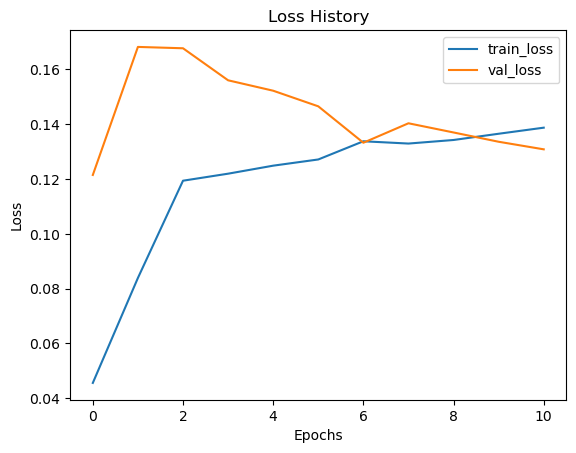

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

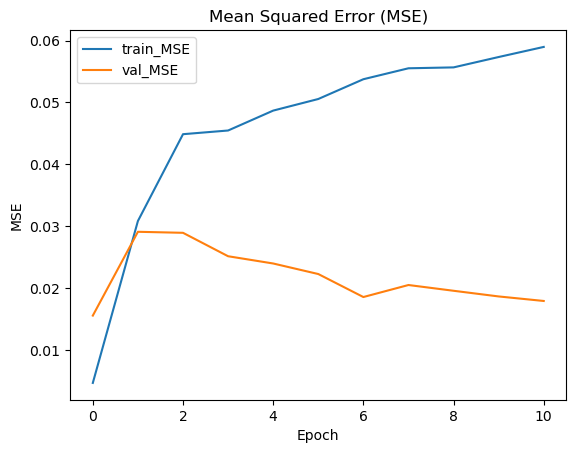

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

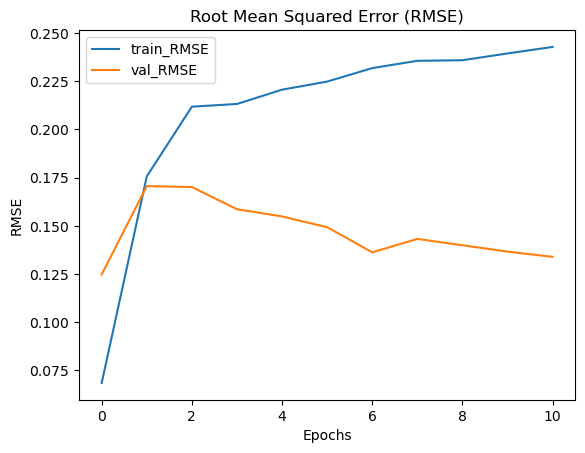

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

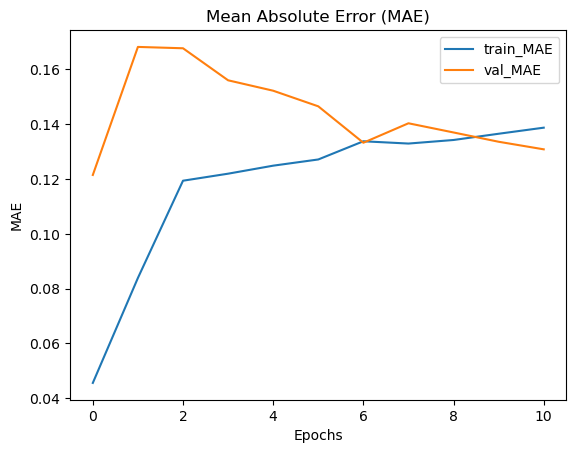

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

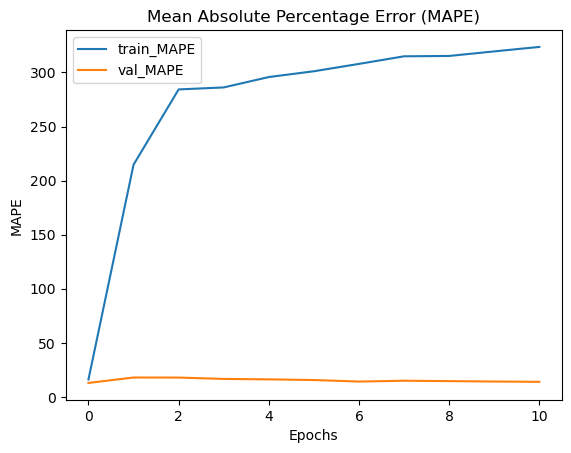

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:22:59.293874: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


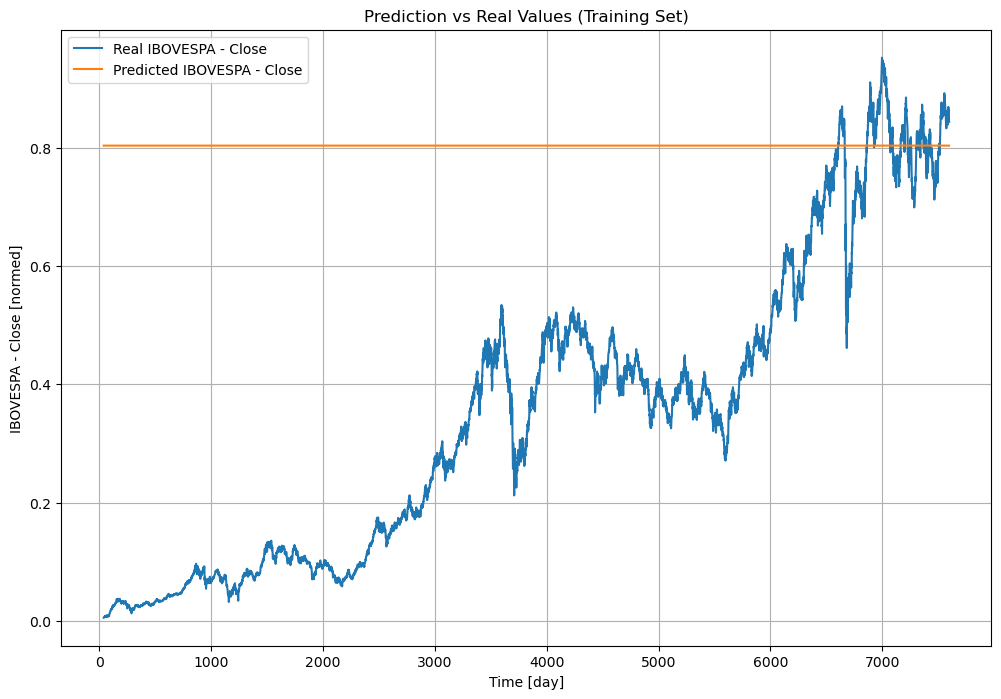

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


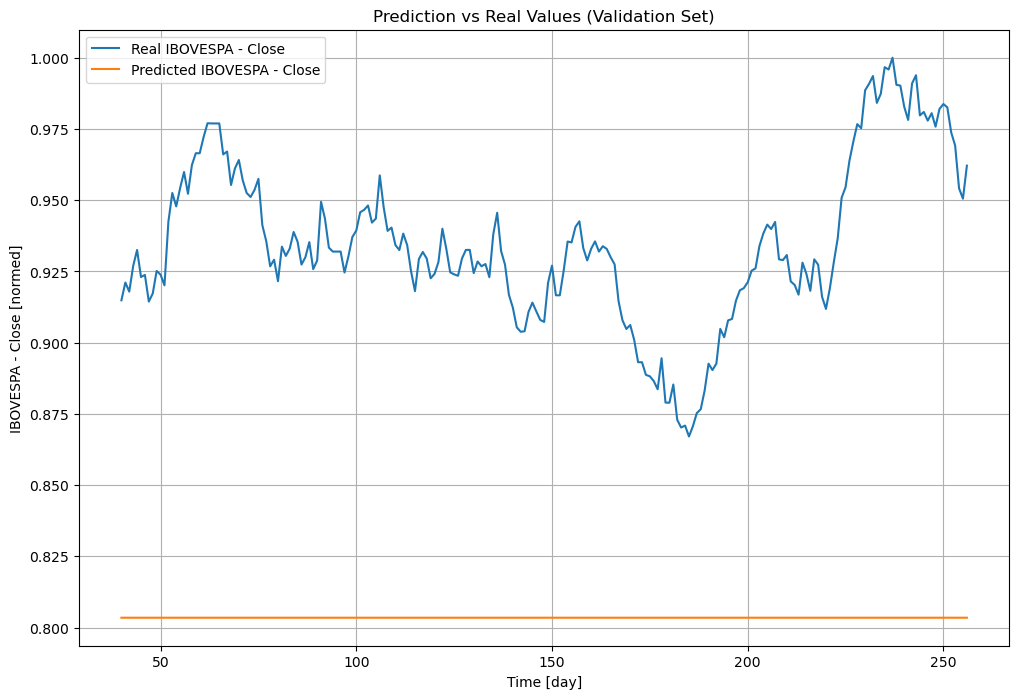

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


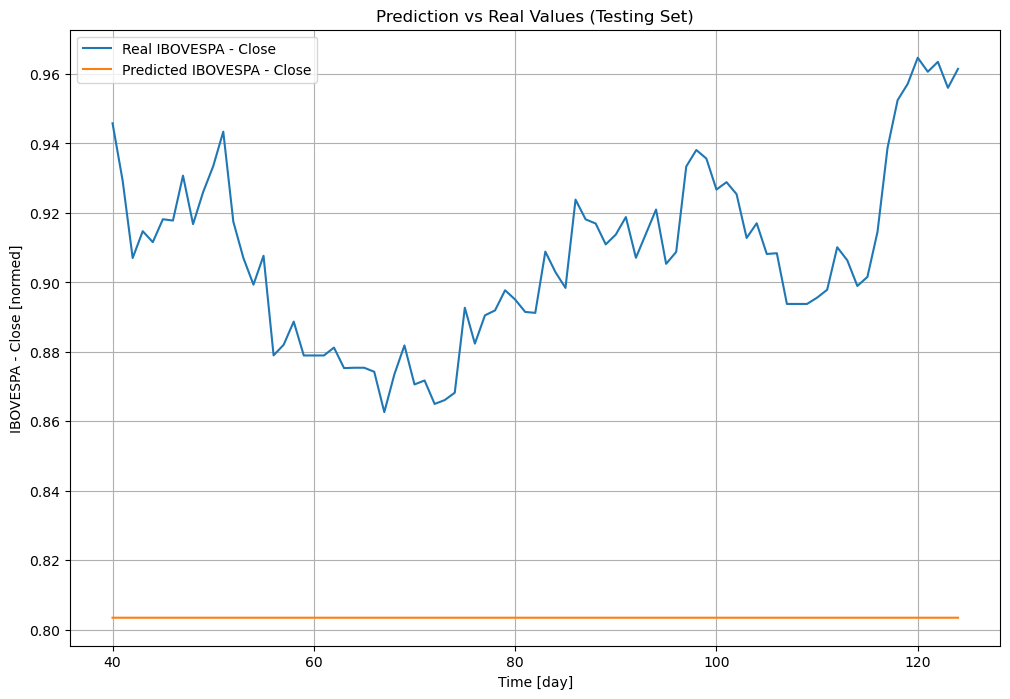

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

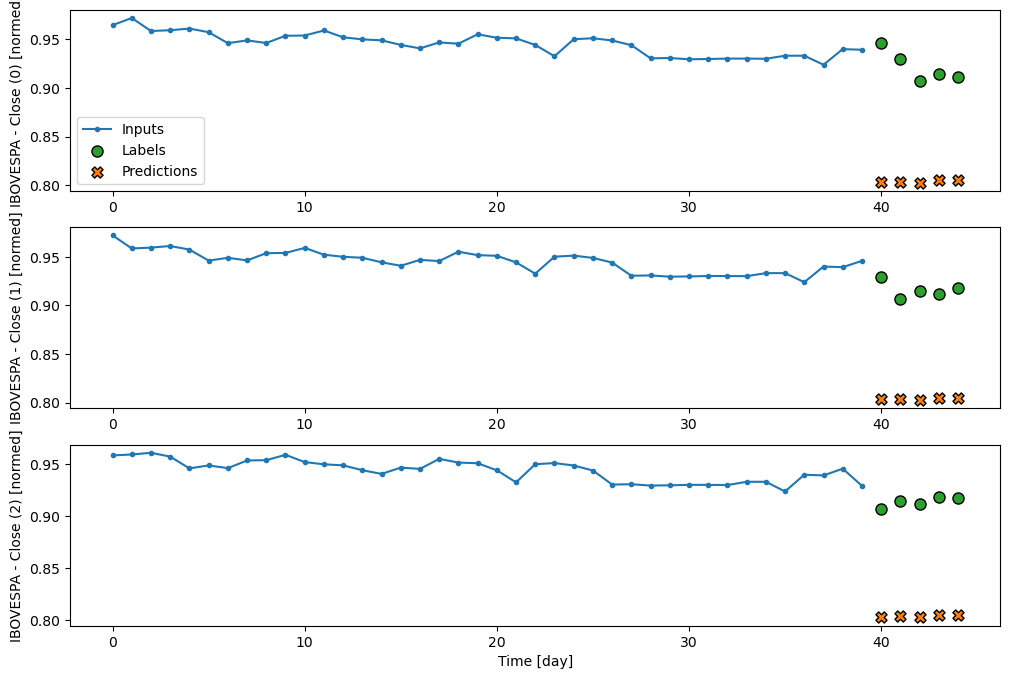

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:33s:431ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


array([[[0.8034641 , 0.8034641 , 0.8034641 , ..., 0.8034641 ,
         0.8034641 , 0.8034641 ],
        [0.80368763, 0.80368763, 0.80368763, ..., 0.80368763,
         0.80368763, 0.80368763],
        [0.8026888 , 0.8026888 , 0.8026888 , ..., 0.8026888 ,
         0.8026888 , 0.8026888 ],
        [0.80502146, 0.80502146, 0.80502146, ..., 0.80502146,
         0.80502146, 0.80502146],
        [0.8052671 , 0.8052671 , 0.8052671 , ..., 0.8052671 ,
         0.8052671 , 0.8052671 ]],

       [[0.80346406, 0.80346406, 0.80346406, ..., 0.80346406,
         0.80346406, 0.80346406],
        [0.80368763, 0.80368763, 0.80368763, ..., 0.80368763,
         0.80368763, 0.80368763],
        [0.8026887 , 0.8026887 , 0.8026887 , ..., 0.8026887 ,
         0.8026887 , 0.8026887 ],
        [0.8050215 , 0.8050215 , 0.8050215 , ..., 0.8050215 ,
         0.8050215 , 0.8050215 ],
        [0.8052671 , 0.8052671 , 0.8052671 , ..., 0.8052671 ,
         0.8052671 , 0.8052671 ]],

       [[0.8034641 , 0.8034641 , 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')